In [109]:
from hicmatrix import HiCMatrix as hm
from hicmatrix.lib import MatrixFileHandler
import numpy as np
import pandas as pd
from scipy import stats, sparse
import bottleneck
from scipy.stats import mannwhitneyu
import h5py
import os.path
import gc
import os
import matplotlib.pyplot as plt
from pyranges import read_gtf


from umap import UMAP
#import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import scipy.spatial as sp, scipy.cluster.hierarchy as hc

import seaborn as sns


import anndata as ad
import scanpy as sc


In [110]:
class2_dict = {'Chandelier': "N",
 'Lamp5': "N",
 'Lamp5_Lhx6': "N",
 'Pax6': "N",
 'Pvalb': "N",
 'Sncg': "N",
 'Sst': "N",
 'Chandelier': "N",
 'Sst Chodl': "N",
 'Meis2': "N",
 'Vip': "N",
 'L2/3 IT': "N",
 'L4 IT': "N",
 'L5 ET': "N",
 'L5 IT': "N",
 'L5 PT': "N",
 'L4/5 IT': "N",
 'L5/6 NP': "N",
 'L6 CT': "N",
 'L6 IT': "N",
 'L6 IT Car3': "N",
 'L6b': "N",
 'Astro': 'NN',
 'Endo': 'NN',
 'Micro-PVM': 'NN',
 'OPC': 'NN',
 'Oligo': "NN",
 'VLMC':'NN', 
 'Peri': 'NN',
 'SMC': 'NN',
 'T cell': 'heart',
 'basophil': 'heart',
 'erythroblast': 'heart',
 'granulocyte': 'heart',
 'hematopoietic precursor cell': 'heart',
 'immature B cell': 'heart',
 'immature natural killer cell': 'heart',
 'late pro-B cell': 'heart',
 'macrophage': 'heart',
 'monocyte': 'heart',
 'naive B cell': 'heart',
 'pro-B cell': 'heart',
 'proerythroblast' : 'heart',
 'Adipocytes' : 'heart',
 'Cardiomyocytes': 'heart',
 'Endocardial': 'heart',
 'Endothelial_Arterial': 'heart' ,
 'Endothelial_Capillaries': 'heart',
 'Endothelial_Other': 'heart',
 'Endothelial_Venous': 'heart',
 'Fibroblasts': 'heart',
 'Pericytes_Stromal': 'heart',
 'Smooth_Muscle_Cells': 'heart',
 'Pericytes': 'heart',
 'Epicardium_FB-like': 'heart',
 'Epicardium_Meso': 'heart',
 'Epicardium_Proliferating': 'heart',
 'Immature_Cardiomyocytes': 'heart',
 'Immature_other': 'heart',
 'Lymphoid_Immune_Cells': 'heart',
 'Myeloid_Immune_Cells': 'heart',
 'Neuronal_Cells': 'heart',}



In [111]:
class3_dict= {'Chandelier': "N",
 'Lamp5': "N",
 'Lamp5_Lhx6': "N",
 'Pax6': "N",
 'Pvalb': "N",
 'Sncg': "N",
 'Sst': "N",
 'Chandelier': "N",
 'Sst Chodl': "N",
 'Meis2': "N",
 'Vip': "N",
 'L2/3 IT': "IT",
 'L4 IT': "IT",
 'L5 ET': "nIT",
 'L5 IT': "IT",
 'L5 PT': "nIT",
 'L4/5 IT': "IT",
 'L5/6 NP': "nIT",
 'L6 CT': "nIT",
 'L6 IT': "IT",
 'L6 IT Car3': "IT",
 'L6b': "nIT",
 'Astro': 'NN',
 'Endo': 'NN',
 'Micro-PVM': 'NN',
 'OPC': 'NN',
 'Oligo': "NN",
 'VLMC':'NN', 
 'Peri': 'NN',
 'SMC': 'NN',
 'T cell': 'heart',
 'basophil': 'heart',
 'erythroblast': 'heart',
 'granulocyte': 'heart',
 'hematopoietic precursor cell': 'heart',
 'immature B cell': 'heart',
 'immature natural killer cell': 'heart',
 'late pro-B cell': 'heart',
 'macrophage': 'heart',
 'monocyte': 'heart',
 'naive B cell': 'heart',
 'pro-B cell': 'heart',
 'proerythroblast' : 'heart',
 'Adipocytes' : 'heart',
 'Cardiomyocytes': 'heart',
 'Endocardial': 'heart',
 'Endothelial_Arterial': 'heart' ,
 'Endothelial_Capillaries': 'heart',
 'Endothelial_Other': 'heart',
 'Endothelial_Venous': 'heart',
 'Fibroblasts': 'heart',
 'Pericytes_Stromal': 'heart',
 'Smooth_Muscle_Cells': 'heart',
 'Pericytes': 'heart',
 'Epicardium_FB-like': 'heart',
 'Epicardium_Meso': 'heart',
 'Epicardium_Proliferating': 'heart',
 'Immature_Cardiomyocytes': 'heart',
 'Immature_other': 'heart',
 'Lymphoid_Immune_Cells': 'heart',
 'Myeloid_Immune_Cells': 'heart',
 'Neuronal_Cells': 'heart',}



In [224]:
class4_dict = {'Chandelier': "N",
 'Lamp5': "N",
 'Lamp5_Lhx6': "N",
 'Pax6': "N",
 'Pvalb': "N",
 'Sncg': "N",
 'Sst': "N",
 'Chandelier': "N",
 'Sst Chodl': "N",
 'Meis2': "N",
 'Vip': "N",
 'L2/3 IT': "IT",
 'L4 IT': "IT",
 'L5 ET': "IT",
 'L5 IT': "IT",
 'L5 PT': "IT",
 'L4/5 IT': "IT",
 'L5/6 NP': "IT",
 'L6 CT': "IT",
 'L6 IT': "IT",
 'L6 IT Car3': "IT",
 'L6b': "IT",
 'Astro': 'NN',
 'Endo': 'NN',
 'Micro-PVM': 'NN',
 'OPC': 'NN',
 'Oligo': "NN",
 'VLMC':'NN', 
 'Peri': 'NN',
 'SMC': 'NN',
 'T cell': 'heart',
 'basophil': 'heart',
 'erythroblast': 'heart',
 'granulocyte': 'heart',
 'hematopoietic precursor cell': 'heart',
 'immature B cell': 'heart',
 'immature natural killer cell': 'heart',
 'late pro-B cell': 'heart',
 'macrophage': 'heart',
 'monocyte': 'heart',
 'naive B cell': 'heart',
 'pro-B cell': 'heart',
 'proerythroblast' : 'heart',
 'Adipocytes' : 'heart',
 'Cardiomyocytes': 'heart',
 'Endocardial': 'heart',
 'Endothelial_Arterial': 'heart' ,
 'Endothelial_Capillaries': 'heart',
 'Endothelial_Other': 'heart',
 'Endothelial_Venous': 'heart',
 'Fibroblasts': 'heart',
 'Pericytes_Stromal': 'heart',
 'Smooth_Muscle_Cells': 'heart',
 'Pericytes': 'heart',
 'Epicardium_FB-like': 'heart',
 'Epicardium_Meso': 'heart',
 'Epicardium_Proliferating': 'heart',
 'Immature_Cardiomyocytes': 'heart',
 'Immature_other': 'heart',
 'Lymphoid_Immune_Cells': 'heart',
 'Myeloid_Immune_Cells': 'heart',
 'Neuronal_Cells': 'heart',}



In [113]:
compress_name_dict = {'Chandelier': "Chr",
 'Lamp5': "Lp5",
 'Lamp5_Lhx6': "Lp5x6",
 'Pax6': "Pax6",
 'Pvalb': "Pvalb",
 'Sncg': "Sncg",
 'Sst': "Sst",
 'Sst Chodl': "SstChl",
 'Meis2': "Meis2",
 'Vip': "Vip",
 'L2/3 IT': "L2/3IT",
 'L4 IT': "L4IT",
 'L5 ET': "L5ET",
 'L5 IT': "L5IT",
 'L5 PT': "L5PT",
 'L4/5 IT': "L4/5IT",
 'L5/6 NP': "L5/6 NP",
 'L6 CT': "L6 CT",
 'L6 IT': "L6 IT",
 'L6 IT Car3': "L6ITCar3",
 'L6b': "L6b",
 'Astro': 'Astro',
 'Endo': 'Endo',
 'Micro-PVM': 'Micro',
 'OPC': 'OPC',
 'Oligo': "Oligo",
 'VLMC':'VLMC', 
 'Peri': 'Peri',
 'SMC': 'SMC',
 'T cell': 'TC',
 'basophil': 'baso',
 'erythroblast': 'eblast',
 'granulocyte': 'glcyte',
 'hematopoietic precursor cell': 'hpc',
 'immature B cell': 'iBC',
 'immature natural killer cell': 'iNKC',
 'late pro-B cell': 'lpBC',
 'macrophage': 'macro',
 'monocyte': 'mono',
 'naive B cell': 'nBC',
 'pro-B cell': 'pBC',
 'proerythroblast' : 'peblast',
 'Adipocytes' : 'Adipo',
 'Cardiomyocytes': 'Cmc',
 'Endocardial': 'Endo',
 'Endothelial_Arterial': 'EndoA' ,
 'Endothelial_Capillaries': 'EndoC',
 'Endothelial_Other': 'EndoO',
 'Endothelial_Venous': 'EndoV',
 'Fibroblasts': 'Fib',
 'Pericytes_Stromal': 'Peri_stro',
 'Smooth_Muscle_Cells': 'SMC',
 'Pericytes': 'Peri',
 'Epicardium_FB-like': 'EpiFB',
 'Epicardium_Meso': 'EpiMeso',
 'Epicardium_Proliferating': 'EpiPro',
 'Immature_Cardiomyocytes': 'iCmc',
 'Immature_other': 'iOther',
 'Lymphoid_Immune_Cells': 'Lymph',
 'Myeloid_Immune_Cells': 'Myel',
 'Neuronal_Cells': 'Neuro',}



In [114]:
values = [
    'Chandelier', 'Lamp5', 'Lamp5_Lhx6', 'Pax6', 'Pvalb', 'Sncg', 'Sst',
    'Sst Chodl', 'Meis2', 'Vip', 'L2/3 IT', 'L4 IT', 'L5 ET', 'L5 IT', 'L5 PT',
    'L4/5 IT', 'L5/6 NP', 'L6 CT', 'L6 IT', 'L6 IT Car3', 'L6b'
]

# Generate shades of purple
num_colors = len(values)+10
purples = sns.color_palette("Purples", num_colors)

# Create a dictionary mapping each value to a color
color_map_n = {value: color for value, color in zip(values, purples[10:])}

values = [
    'Astro', 'Endo', 'Micro-PVM', 'OPC', 'Oligo', 'VLMC', 'Peri', 'SMC'
]

# Generate shades of purple
num_colors = len(values)+3
purples = sns.color_palette("Greens", num_colors)

# Create a dictionary mapping each value to a color
color_map_nn = {value: color for value, color in zip(values, purples[3:])}



values = [
    'T cell', 'basophil', 'erythroblast', 'granulocyte', 'hematopoietic precursor cell', 'immature B cell', 'immature natural killer cell', 'late pro-B cell', 'macrophage', 'monocyte', 'naive B cell', 'pro-B cell', 'proerythroblast',
]

# Generate shades of purple
num_colors = len(values)+5
purples = sns.color_palette("Reds", num_colors)

# Create a dictionary mapping each value to a color
color_map_bl = {value: color for value, color in zip(values, purples[5:])}



values = [
    'Adipocytes', 'Cardiomyocytes', 'Endocardial', 'Endothelial_Arterial', 'Endothelial_Capillaries', 'Endothelial_Other', 'Endothelial_Venous', 'Fibroblasts', 'Pericytes_Stromal', 'Smooth_Muscle_Cells', 'Pericytes', 'Epicardium_FB-like', 'Epicardium_Meso', 'Epicardium_Proliferating', 'Immature_Cardiomyocytes', 'Immature_other', 'Lymphoid_Immune_Cells', 'Myeloid_Immune_Cells', 'Neuronal_Cells']

# Generate shades of purple
num_colors = len(values)+10
purples = sns.color_palette("Reds", num_colors)

# Create a dictionary mapping each value to a color
color_map_ht = {value: color for value, color in zip(values, purples[10:])}



In [115]:
from hicmatrix import HiCMatrix as hm
from hicmatrix.lib import MatrixFileHandler
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='white', font_scale=1.5)
plt.rc("axes.spines", top=False, right=False)
plt.rc('xtick', bottom=True)
plt.rc('ytick', left=True)
import joypy

In [122]:
from hicmatrix import HiCMatrix as hm
from hicmatrix.lib import MatrixFileHandler
import numpy as np
import pandas as pd
from scipy import stats, sparse
import bottleneck
from scipy.stats import mannwhitneyu
import h5py
import os.path
import gc
import os
import matplotlib.pyplot as plt
from pyranges import read_gtf


from umap import UMAP
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import scipy.spatial as sp, scipy.cluster.hierarchy as hc

import seaborn as sns


import anndata as ad
import scanpy as sc


#egad function

import numpy as np
import pandas as pd
from scipy import stats, sparse
import bottleneck




def calculate_overlap(df, df_b, corr_method):
    # Perform bin intersection
    bins_intersect = set(df.columns.tolist()).intersection(set(df_b.columns.tolist()))
    df = df.loc[:, bins_intersect]
    #df = df.fillna(0)
    #df_b = df_b.fillna(0)
    df_b = df_b.loc[:, bins_intersect]


    # Z-score normalization
    df_b_z = stats.zscore(df_b, axis=0, nan_policy='omit')
    df_b_z = pd.DataFrame(df_b_z, index=df_b.index.tolist(), columns=df_b.columns)
    df_b_z['cell_type'] = df_b_z.index.tolist()
    df_b_z = df_b_z.set_index(['cell_type'])

    df_z = stats.zscore(df, axis=0, nan_policy='omit')
    df_z = pd.DataFrame(df_z, index=df.index.tolist(), columns=df.columns)
    df_z['cell_type'] = df_z.index.tolist()
    df_z['cell_type'] = [x + '_hic' for x in df_z['cell_type']]
    df_z = df_z.set_index(['cell_type'])
    

    # Concatenate dataframes
    df_corr = pd.concat([df_b_z, df_z])

    
    
    #df_corr = df_corr.dropna(axis=1, how='all')
    #df_corr = df_corr.dropna(axis=1)
    
    #df_corr = df_corr.set_index(['cell_type'])

            
    #features_sc = stats.zscore(df_corr, axis=0, nan_policy='omit')
    
    #features_sc = features_sc.dropna(how='all', axis=1).fillna(0)
    
    #features_sc = features_sc.dropna(how='all', axis=1)
    
                
    #df_dist_df = features_sc.T.corr(min_periods=200, method=corr_method)
    #df_dist_df = df_corr.T.corr(min_periods=10, method=corr_method)



    return df_corr



        

#for each marker-list and input file , I can make one output file

def calc_pair_corr(input_file_h5ad_a, input_file_h5ad_b, file_b_species, outputfile_h5ad, resolution, base_folder, SRP_name):

        adata = ad.read_h5ad(f'{input_file_h5ad_a}', backed='r')
        adata_b = ad.read_h5ad(f'{input_file_h5ad_b}', backed='r')
        df_b = adata_b.to_df()

        df = adata.to_df()

        cell_type_intersect = df.index.intersection(df_b.index)




        species_input='mouse'
        species_output='human'
        
        if file_b_species == 'mouse':
            species_input='mouse'
            species_output='human'
        else:
            species_input='human'
            species_output='mouse'
        
        full_input_path = f'{base_folder}/hi_c_data_processing/data_{species_input}/{SRP_name}/{resolution}/max/'
        
        full_target_path = f'{base_folder}/hi_c_data_processing/data_{species_output}/{SRP_name}/{resolution}/max/'
        if species_input=='mouse':
            chain_file = 'mm10ToHg38.over.chain.gz'
        else:
            chain_file = 'hg38ToMm10.over.chain.gz'
        for minmatch in [0.5]:

            #os.system(f"{base_folder}/hi_c_data_processing/software/liftOver -minMatch={minmatch} {full_input_path}/regions_bed_file.tsv {base_folder}/hi_c_data_processing/software/{chain_file} {full_input_path}/minmatch{minmatch}_{species_input}_to_{species_output}.bed u")

            os.system(f"bedtools intersect -wo -b {full_input_path}/minmatch{minmatch}_{species_input}_to_{species_output}.bed -a {full_target_path}/regions_bed_file.tsv > {full_target_path}/minmatch{minmatch}_{species_input}_to_{species_output}_matched.bed")

            if species_output=='human':

                df_human_mouse_bins = pd.read_csv(f'{full_target_path}/minmatch{minmatch}_{species_input}_to_{species_output}_matched.bed', sep='\t', names=['a', 'b', 'c', 'human_bin', 'a1', 'b1', 'c1', 'mouse_bin', 'overlap'])
            else:
                df_human_mouse_bins = pd.read_csv(f'{full_target_path}/minmatch{minmatch}_{species_input}_to_{species_output}_matched.bed', sep='\t', names=['a', 'b', 'c', 'mouse_bin', 'a1', 'b1', 'c1', 'human_bin', 'overlap'])

        #correct bin_id to correct bin_id

        df_human_mouse_bins['mouse_bin'] = [f"bin_{i}" for i in df_human_mouse_bins['mouse_bin'].tolist()]
        df_human_mouse_bins['human_bin'] = [f"bin_{i}" for i in df_human_mouse_bins['human_bin'].tolist()]


        dk_human = df.copy()
        dk_mouse = df_b.copy()

        df_human_mouse_bins  = df_human_mouse_bins[df_human_mouse_bins['mouse_bin'].isin(dk_mouse.T.index.tolist())]
        df_human_mouse_bins  = df_human_mouse_bins[df_human_mouse_bins['human_bin'].isin(dk_human.T.index.tolist())]
                

        np_of_col = len(cell_type_intersect)*2
        np_of_rows = len(cell_type_intersect)*2
        
        adata_l = ad.AnnData(np.zeros((np_of_rows, np_of_col)))

        
        layer_names = adata.layers.keys()    
        for corr_method in ['pearson']:
                        for given_layer in ['mean']:


                                df = adata.to_df(layer=given_layer)

                                df = df.loc[cell_type_intersect,:]
                            
                                print (df)
                            

                                df_b = adata_b.to_df(layer=given_layer)

                                df_b = df_b.loc[cell_type_intersect,:]


                                df = df.loc[:,df_human_mouse_bins['human_bin'].tolist()]

                                df = df.T
                                df.index = df_human_mouse_bins['mouse_bin'].tolist()
                                df = df.T
                                df_b = df_b.loc[:,df_human_mouse_bins['mouse_bin'].tolist()]




                                df_concat = calculate_overlap(df, df_b, corr_method)
                                
                                df_concat.to_csv(outputfile_h5ad)


In [93]:
#os.system(f"bedtools intersect -wo -b {full_input_path}/minmatch{minmatch}_{species_input}_to_{species_output}.bed -a {full_target_path}/regions_bed_file.tsv > {full_target_path}/minmatch{minmatch}_{species_input}_to_{species_output}_matched.bed")


0

In [170]:

#no_of_markers_list = [1,2,3,4,5,6,7,8,9,10,11,12,13,15,17,19,21,23,25,29,33,37,41,46,50,58,65,73,82,92,100,115,129,144,150,162,181,200,227,250,284,300,356,400,446,500]     
no_of_markers_list = [200]       
for no_of_markers in no_of_markers_list:

    for species in ['human']:
        for process_type in ['inter']:
            for resolution in ['1kbp_raw']:
                for shuf in [False]:
                    for drop_duplicates in [False]:                                                                                                                                                                    
                        for marker_name in ['brain_class']:
                                dist = 0
                                layer_name = 'z_scores'
                                base_folder = '/grid/gillis/data_norepl/lohia/'
                                SRP_name='aggregates'
                                ice_type='none'

                                if species=='mouse':
                                    gene_annot_file=f'{base_folder}/hi_c_data_processing/genomes_jlee/Mus_musculus.GRCm38.94.gtf.gz'
                                else:
                                    gene_annot_file=f'{base_folder}/hi_c_data_processing/genomes_jlee/gencode.v28.chr_patch_hapl_scaff.annotation.gtf.gz' 

                                #input_file_h5ad = f'{base_folder}/hi_c_data_processing/data_{species}/aggregates/{resolution}/max/hic_gene_{process_type}_{ice_type}_{dist}_{layer_name}_{drop_duplicates}_{shuf}_{marker_name}_{no_of_markers}_by_allbins_max_mean.h5ad'
                                input_file_h5ad = f'{base_folder}/hi_c_data_processing/data_{species}/aggregates/{resolution}/max/{marker_name}/mean/hic_gene_{ice_type}_{process_type}_{dist}_{layer_name}_{drop_duplicates}_{shuf}_{marker_name}_{no_of_markers}_by_allbins_max_mean.h5ad'
                                #f'{base_folder}/hi_c_data_processing/data_{species}/aggregates/{resolution}/max/hic_gene_{process_type}_{ice_type}_{process_type}_{dist}_{layer_name}_by_allbins_max.h5ad'
                                
                                
                                outputfile_h5ad = f'{base_folder}/hi_c_data_processing/data_{species}/aggregates/{resolution}/max/hic_gene_{process_type}_{ice_type}_{dist}_{layer_name}_{drop_duplicates}_{shuf}_{marker_name}_{no_of_markers}_by_allbins_max_mean_cross_species_overlap_matrix.h5ad'

                                if species == 'human':
                                    species_b = 'mouse'
                                #input_file_h5ad_b = f'{base_folder}/hi_c_data_processing/data_{species_b}/aggregates/{resolution}/max/hic_gene_{process_type}_{ice_type}_{dist}_{layer_name}_{drop_duplicates}_{shuf}_{marker_name}_{no_of_markers}_by_allbins_max_mean.h5ad'
                                input_file_h5ad_b = f'{base_folder}/hi_c_data_processing/data_{species_b}/aggregates/{resolution}/max/{marker_name}/mean/hic_gene_{ice_type}_{process_type}_{dist}_{layer_name}_{drop_duplicates}_{shuf}_{marker_name}_{no_of_markers}_by_allbins_max_mean.h5ad'
                                #calc_pair_corr(input_file_h5ad, input_file_h5ad_b, species_b, outputfile_h5ad, marker_name)
                                calc_pair_corr(input_file_h5ad, input_file_h5ad_b, species_b, outputfile_h5ad, resolution, base_folder, SRP_name)


            bin_0  bin_1  bin_2  bin_3  bin_4  bin_5  bin_6  bin_7  bin_8  \
Lamp5         NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
Sncg          NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
L5 IT         NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
Pvalb         NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
L2/3 IT       NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
L6 IT         NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
L6 IT Car3    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
L6b           NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
Astro         NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
Micro-PVM     NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
Oligo         NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
VLMC          NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

In [125]:
#no_of_markers_list = [1,2,3,4,5,6,7,8,9,10,11,12,13,15,17,19,21,23,25,29,33,37,41,46,50,58,65,73,82,92,100,115,129,144,150,162,181,200,227,250,284,300,356,400,446,500]     
df_list = []
no_of_markers_list = [200]   
for no_of_markers in no_of_markers_list:

    for species in ['human']:
        for process_type in ['intra']:
            for resolution in ['1kbp_raw', '10kbp_raw']:
                for shuf in [False]:
                    for drop_duplicates in [False]:
                        for marker_name in ['brain_class']:
                                dist = 0
                                layer_name = 'z_scores'
                                base_folder = '/grid/gillis/data_norepl/lohia/'
                                SRP_name='aggregates'
                                ice_type='KR'

                                if species=='mouse':
                                    gene_annot_file=f'{base_folder}/hi_c_data_processing/genomes_jlee/Mus_musculus.GRCm38.94.gtf.gz'
                                else:
                                    gene_annot_file=f'{base_folder}/hi_c_data_processing/genomes_jlee/gencode.v28.chr_patch_hapl_scaff.annotation.gtf.gz' 

                                #input_file_h5ad = f'{base_folder}/hi_c_data_processing/data_{species}/aggregates/{resolution}/max/hic_gene_{process_type}_{ice_type}_{dist}_{layer_name}_{drop_duplicates}_{shuf}_{marker_name}_{no_of_markers}_by_allbins_max_mean.h5ad'
                                input_file_h5ad = f'{base_folder}/hi_c_data_processing/data_{species}/aggregates/{resolution}/max/{marker_name}/mean/hic_gene_{ice_type}_{process_type}_{dist}_{layer_name}_{drop_duplicates}_{shuf}_{marker_name}_{no_of_markers}_by_allbins_max_mean.h5ad'
                                #f'{base_folder}/hi_c_data_processing/data_{species}/aggregates/{resolution}/max/hic_gene_{process_type}_{ice_type}_{process_type}_{dist}_{layer_name}_by_allbins_max.h5ad'
                                
                                
                                outputfile_h5ad = f'{base_folder}/hi_c_data_processing/data_{species}/aggregates/{resolution}/max/hic_gene_{process_type}_{ice_type}_{dist}_{layer_name}_{drop_duplicates}_{shuf}_{marker_name}_{no_of_markers}_by_allbins_max_mean_cross_species_overlap_matrix.h5ad'

                                df = pd.read_csv(outputfile_h5ad).set_index('cell_type')
                                
                                df_list.append(df)

#df_dict = pd.DataFrame(list(class3_dict.items()), columns=['name', 'subclass'])


In [172]:
no_of_markers_list = [200]   
for no_of_markers in no_of_markers_list:

    for species in ['human']:
        for process_type in ['inter']:
            for resolution in ['1kbp_raw']:
                for shuf in [False]:
                    for drop_duplicates in [False]:
                        for marker_name in ['brain_class']:
                                dist = 0
                                layer_name = 'z_scores'
                                base_folder = '/grid/gillis/data_norepl/lohia/'
                                SRP_name='aggregates'
                                ice_type='none'

                                if species=='mouse':
                                    gene_annot_file=f'{base_folder}/hi_c_data_processing/genomes_jlee/Mus_musculus.GRCm38.94.gtf.gz'
                                else:
                                    gene_annot_file=f'{base_folder}/hi_c_data_processing/genomes_jlee/gencode.v28.chr_patch_hapl_scaff.annotation.gtf.gz' 

                                #input_file_h5ad = f'{base_folder}/hi_c_data_processing/data_{species}/aggregates/{resolution}/max/hic_gene_{process_type}_{ice_type}_{dist}_{layer_name}_{drop_duplicates}_{shuf}_{marker_name}_{no_of_markers}_by_allbins_max_mean.h5ad'
                                input_file_h5ad = f'{base_folder}/hi_c_data_processing/data_{species}/aggregates/{resolution}/max/{marker_name}/mean/hic_gene_{ice_type}_{process_type}_{dist}_{layer_name}_{drop_duplicates}_{shuf}_{marker_name}_{no_of_markers}_by_allbins_max_mean.h5ad'
                                #f'{base_folder}/hi_c_data_processing/data_{species}/aggregates/{resolution}/max/hic_gene_{process_type}_{ice_type}_{process_type}_{dist}_{layer_name}_by_allbins_max.h5ad'
                                
                                
                                outputfile_h5ad = f'{base_folder}/hi_c_data_processing/data_{species}/aggregates/{resolution}/max/hic_gene_{process_type}_{ice_type}_{dist}_{layer_name}_{drop_duplicates}_{shuf}_{marker_name}_{no_of_markers}_by_allbins_max_mean_cross_species_overlap_matrix.h5ad'

                                df = pd.read_csv(outputfile_h5ad).set_index('cell_type')
                                
                                #df_list.append(df)

In [635]:
df_dict = pd.DataFrame(list(class4_dict.items()), columns=['name', 'subclass'])
df_dict2 = pd.DataFrame([(x[0]+'_hic', x[1] ) for x in list(class4_dict.items())], columns=['name', 'subclass'])




In [636]:
df_dict = pd.concat([df_dict, df_dict2])

In [637]:
class4_dict

{'Chandelier': 'N',
 'Lamp5': 'N',
 'Lamp5_Lhx6': 'N',
 'Pax6': 'N',
 'Pvalb': 'N',
 'Sncg': 'N',
 'Sst': 'N',
 'Sst Chodl': 'N',
 'Meis2': 'N',
 'Vip': 'N',
 'L2/3 IT': 'IT',
 'L4 IT': 'IT',
 'L5 ET': 'IT',
 'L5 IT': 'IT',
 'L5 PT': 'IT',
 'L4/5 IT': 'IT',
 'L5/6 NP': 'IT',
 'L6 CT': 'IT',
 'L6 IT': 'IT',
 'L6 IT Car3': 'IT',
 'L6b': 'IT',
 'Astro': 'NN',
 'Endo': 'NN',
 'Micro-PVM': 'NN',
 'OPC': 'NN',
 'Oligo': 'NN',
 'VLMC': 'NN',
 'Peri': 'NN',
 'SMC': 'NN',
 'T cell': 'heart',
 'basophil': 'heart',
 'erythroblast': 'heart',
 'granulocyte': 'heart',
 'hematopoietic precursor cell': 'heart',
 'immature B cell': 'heart',
 'immature natural killer cell': 'heart',
 'late pro-B cell': 'heart',
 'macrophage': 'heart',
 'monocyte': 'heart',
 'naive B cell': 'heart',
 'pro-B cell': 'heart',
 'proerythroblast': 'heart',
 'Adipocytes': 'heart',
 'Cardiomyocytes': 'heart',
 'Endocardial': 'heart',
 'Endothelial_Arterial': 'heart',
 'Endothelial_Capillaries': 'heart',
 'Endothelial_Other': 'h

In [643]:
df = df[df.index.isin(df_dict[df_dict['subclass'].isin(['IT'])]['name'].tolist())]

In [127]:
len(df_list)

3

In [284]:
df = df_list[0]

In [175]:
df_list[3] = df

In [642]:
df = df_list[3]

In [277]:
                                df_dict = pd.DataFrame(list(class4_dict.items()), columns=['name', 'subclass'])
                                df = df[df.index.isin(df_dict[df_dict['subclass'].isin(['IT'])]['name'].tolist())]
                                df_layer = df.dropna(axis=1, how='all')

In [259]:
df = df.dropna(axis=1, how='all')
df = df.loc[:, (df.sum(axis=0) != 0)]
df = df - df.mean()

In [644]:
# Filter out columns with a period in their name
filtered_columns = [col for col in df.columns if '.' not in col]

# Create a new DataFrame with these filtered columns
df_filtered = df[filtered_columns]

In [645]:
df_layer = df_filtered.dropna(axis=1, how='all')
scaler = StandardScaler()
scaler.fit(df_layer)
df_layer_scaled = scaler.transform(df_layer)
df_layer_scaled = np.nan_to_num(df_layer_scaled, nan=0.0)


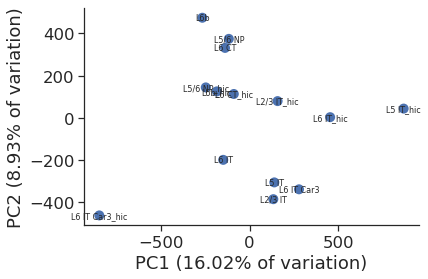

In [646]:


    
    pca = PCA(n_components=2, random_state=1)
    proj_2d = pca.fit_transform(df_layer_scaled)
    #proj_2d = pca.fit_transform(df.dropna(axis=1).fillna(0).values)
    #proj_2d = pca.fit_transform(R1)
    #umap_2d = UMAP(n_components=2, init='random', random_state=10)
    #proj_2d = umap_2d.fit_transform(features_sc)

    df_proj_2d = pd.DataFrame(proj_2d, columns=['PC1', 'PC2'])

    # Access explained variance ratio
    explained_variance_ratio = pca.explained_variance_ratio_
    
    #df_proj_2d['subclass'] = [class2_dict[x] for x in df_layer.index.tolist()]
    df_proj_2d['subclass'] = [class2_dict[x.split('_hic')[0]] for x in df.index.tolist()]
    #df_proj_2d = df_proj_2d[df_proj_2d['subclass'].isin(['IT', 'nIT'])]
    df_proj_2d['cell_type'] = df.index.tolist()
    #df_proj_2d = df_proj_2d.sort_values(by=['subclass'])



    ax = sns.scatterplot(
        x=df_proj_2d['PC1'],
        y=df_proj_2d['PC2'],
        hue=df_proj_2d['subclass'],
        s=100,
        linewidth=0, 
        legend=False # Remove legend box
    )
    # Initialize list to store labeled point positions
    labeled_points = []

    # Add text labels with adjusted positions to reduce overlap
    for i, row in df_proj_2d.iterrows():
        # Define offset values based on the scale of the plot and density of points
        x_offset = 0
        y_offset = 0
        # Check if label overlaps with any existing label
        #while any(abs(row[0] - x) < x_offset and abs(row[1] - y) < y_offset for x, y, _ in labeled_points):
        #    x_offset += 10
        #    y_offset += 10
        # Add label to the plot with adjusted positions
        plt.text(row[0] + x_offset, row[1] + y_offset, str(row['cell_type']), fontsize=8, ha='center', va='center')
        # Record labeled point to avoid overlapping
        labeled_points.append((row[0] + x_offset, row[1] + y_offset, row['cell_type']))
    #sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    
    ax.set_xlabel(f'PC1 ({explained_variance_ratio[0]*100:.2f}% of variation)')
    ax.set_ylabel(f'PC2 ({explained_variance_ratio[1]*100:.2f}% of variation)')


    # Show the plot
    #plt.show()
    plt.show()
    #plt.plot()

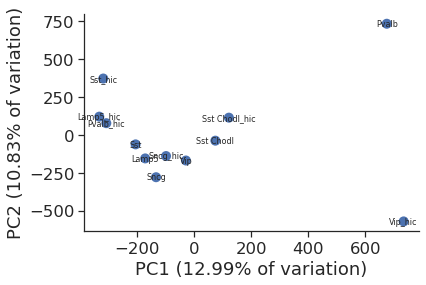

In [275]:


    
    pca = PCA(n_components=2, random_state=1)
    proj_2d = pca.fit_transform(df_layer_scaled)
    #proj_2d = pca.fit_transform(df.dropna(axis=1).fillna(0).values)
    #proj_2d = pca.fit_transform(R1)
    #umap_2d = UMAP(n_components=2, init='random', random_state=10)
    #proj_2d = umap_2d.fit_transform(features_sc)

    df_proj_2d = pd.DataFrame(proj_2d, columns=['PC1', 'PC2'])

    # Access explained variance ratio
    explained_variance_ratio = pca.explained_variance_ratio_
    
    #df_proj_2d['subclass'] = [class2_dict[x] for x in df_layer.index.tolist()]
    df_proj_2d['subclass'] = [class2_dict[x.split('_hic')[0]] for x in df.index.tolist()]
    #df_proj_2d = df_proj_2d[df_proj_2d['subclass'].isin(['IT', 'nIT'])]
    df_proj_2d['cell_type'] = df.index.tolist()
    #df_proj_2d = df_proj_2d.sort_values(by=['subclass'])



    ax = sns.scatterplot(
        x=df_proj_2d['PC1'],
        y=df_proj_2d['PC2'],
        hue=df_proj_2d['subclass'],
        s=100,
        linewidth=0, 
        legend=False # Remove legend box
    )
    # Initialize list to store labeled point positions
    labeled_points = []

    # Add text labels with adjusted positions to reduce overlap
    for i, row in df_proj_2d.iterrows():
        # Define offset values based on the scale of the plot and density of points
        x_offset = 0
        y_offset = 0
        # Check if label overlaps with any existing label
        #while any(abs(row[0] - x) < x_offset and abs(row[1] - y) < y_offset for x, y, _ in labeled_points):
        #    x_offset += 10
        #    y_offset += 10
        # Add label to the plot with adjusted positions
        plt.text(row[0] + x_offset, row[1] + y_offset, str(row['cell_type']), fontsize=8, ha='center', va='center')
        # Record labeled point to avoid overlapping
        labeled_points.append((row[0] + x_offset, row[1] + y_offset, row['cell_type']))
    #sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    
    ax.set_xlabel(f'PC1 ({explained_variance_ratio[0]*100:.2f}% of variation)')
    ax.set_ylabel(f'PC2 ({explained_variance_ratio[1]*100:.2f}% of variation)')


    # Show the plot
    #plt.show()
    plt.show()
    #plt.plot()

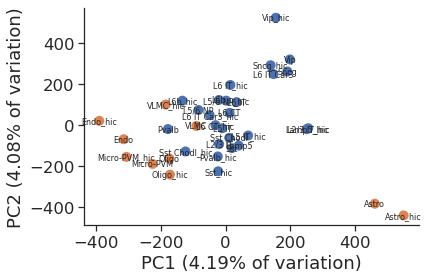

In [146]:


    
    pca = PCA(n_components=2, random_state=1)
    proj_2d = pca.fit_transform(df_layer_scaled)
    #proj_2d = pca.fit_transform(df.dropna(axis=1).fillna(0).values)
    #proj_2d = pca.fit_transform(R1)
    #umap_2d = UMAP(n_components=2, init='random', random_state=10)
    #proj_2d = umap_2d.fit_transform(features_sc)

    df_proj_2d = pd.DataFrame(proj_2d, columns=['PC1', 'PC2'])

    # Access explained variance ratio
    explained_variance_ratio = pca.explained_variance_ratio_
    
    #df_proj_2d['subclass'] = [class2_dict[x] for x in df_layer.index.tolist()]
    df_proj_2d['subclass'] = [class2_dict[x.split('_hic')[0]] for x in df.index.tolist()]
    #df_proj_2d = df_proj_2d[df_proj_2d['subclass'].isin(['IT', 'nIT'])]
    df_proj_2d['cell_type'] = df.index.tolist()
    #df_proj_2d = df_proj_2d.sort_values(by=['subclass'])



    ax = sns.scatterplot(
        x=df_proj_2d['PC1'],
        y=df_proj_2d['PC2'],
        hue=df_proj_2d['subclass'],
        s=100,
        linewidth=0, 
        legend=False # Remove legend box
    )
    # Initialize list to store labeled point positions
    labeled_points = []

    # Add text labels with adjusted positions to reduce overlap
    for i, row in df_proj_2d.iterrows():
        # Define offset values based on the scale of the plot and density of points
        x_offset = 0
        y_offset = 0
        # Check if label overlaps with any existing label
        #while any(abs(row[0] - x) < x_offset and abs(row[1] - y) < y_offset for x, y, _ in labeled_points):
        #    x_offset += 10
        #    y_offset += 10
        # Add label to the plot with adjusted positions
        plt.text(row[0] + x_offset, row[1] + y_offset, str(row['cell_type']), fontsize=8, ha='center', va='center')
        # Record labeled point to avoid overlapping
        labeled_points.append((row[0] + x_offset, row[1] + y_offset, row['cell_type']))
    #sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    
    ax.set_xlabel(f'PC1 ({explained_variance_ratio[0]*100:.2f}% of variation)')
    ax.set_ylabel(f'PC2 ({explained_variance_ratio[1]*100:.2f}% of variation)')


    # Show the plot
    #plt.show()
    plt.show()
    #plt.plot()

In [ ]:
    pca = PCA(n_components=2, random_state=1)
    proj_2d = pca.fit_transform(df_layer_scaled)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming proj_2d is your PCA projection data and pca is your PCA object
df_proj_2d = pd.DataFrame(proj_2d, columns=['PC1', 'PC2'])

# Access explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Adding subclass and cell_type columns
#df_proj_2d['subclass'] = [class2_dict[x] for x in df_layer.index.tolist()]
df_proj_2d['subclass'] = [class2_dict[x.split('_hic')[0]] for x in df_layer.index.tolist()]
df_proj_2d['cell_type'] = df_layer.index.tolist()
df_proj_2d = df_proj_2d.sort_values(by=['subclass'])
df_proj_2d['species'] = ['human' if x.split('_')[-1]=='hic' else 'mouse' for x in df_proj_2d['cell_type'].tolist()]
df_proj_2d['cell_type'] = [x.split('_hic')[0] for x in df_proj_2d['cell_type'].tolist()]
#df_proj_2d['cell_n'] = [compress_name_dict[x] for x in df_proj_2d['cell_type'].tolist()]

# Define your own subclass-to-color mapping
subclass_color_dict = {
    'N': 'blueviolet',  # Blue
    'NN': '#2ca02c',  # Orange
    'heart': 'red',  # Green
    'blood': 'red',  # Green
    # Add more subclasses and their corresponding colors here
}
subclass_color_dict.update(color_map_n)
subclass_color_dict.update(color_map_nn)
subclass_color_dict.update(color_map_bl)
subclass_color_dict.update(color_map_ht)
#subclass_color_dict.update(color_map_IT)
#subclass_color_dict.update(color_map_nIT)
# Plotting
plt.figure(figsize=(8, 6))

ax = sns.scatterplot(
    x='PC1',
    y='PC2',
    hue='cell_type',
    data=df_proj_2d,
    s=150,
    linewidth=1,
    edgecolor='black',
    style='species',
    
    palette=subclass_color_dict,  # Use the custom color palette
)

# Add text labels with adjusted positions to reduce overlap
#for i, row in df_proj_2d.iterrows():
#    plt.text(row['PC1'], row['PC2'], row['cell_n'], fontsize=8, ha='right')
    
# Initialize list to store labeled point positions
labeled_points = []

#Add text labels with adjusted positions to reduce overlap
for i, row in df_proj_2d.iterrows():
    # Define offset values based on the scale of the plot and density of points
    x_offset = 10
    y_offset = -30
    # Check if label overlaps with any existing label
    while any(abs(row[0] - x) < x_offset and abs(row[1] - y) < y_offset for x, y, _ in labeled_points):
        x_offset += 5
        y_offset += 5
    # Add label to the plot with adjusted positions
    #plt.text(row[0] + x_offset, row[1] + y_offset, str(row['cell_type']), fontsize=12, ha='right',va='baseline')
    # Record labeled point to avoid overlapping
    #labeled_points.append((row[0] + x_offset, row[1] + y_offset, row['cell_n']))
#sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

# Set labels for axes
ax.set_xlabel(f'PC1 ({explained_variance_ratio[0]*100:.2f}% of variation)')
ax.set_ylabel(f'PC2 ({explained_variance_ratio[1]*100:.2f}% of variation)')

# Add a title to the plot
#plt.title('PCA Projection')

# Move the legend outside the plot
plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left',ncol=2)

# Add gridlines for better readability
plt.grid(False)

# Show the plot
#plt.show()
#plt.tight_layout()
plt.savefig(f'/home/lohia/{species}_{marker_name}_{drop_duplicates}_{process_type}_pca_cross_species.pdf', transparent=True, bbox_inches='tight')


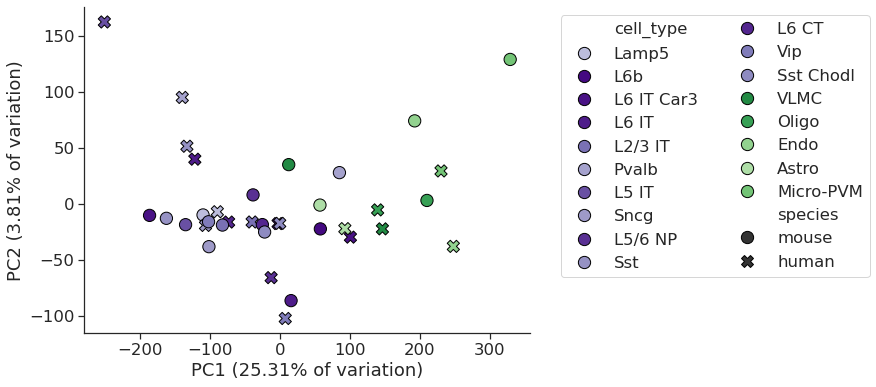

In [169]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming proj_2d is your PCA projection data and pca is your PCA object
df_proj_2d = pd.DataFrame(proj_2d, columns=['PC1', 'PC2'])

# Access explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Adding subclass and cell_type columns
#df_proj_2d['subclass'] = [class2_dict[x] for x in df_layer.index.tolist()]
df_proj_2d['subclass'] = [class2_dict[x.split('_hic')[0]] for x in df_layer.index.tolist()]
df_proj_2d['cell_type'] = df_layer.index.tolist()
df_proj_2d = df_proj_2d.sort_values(by=['subclass'])
df_proj_2d['species'] = ['human' if x.split('_')[-1]=='hic' else 'mouse' for x in df_proj_2d['cell_type'].tolist()]
df_proj_2d['cell_type'] = [x.split('_hic')[0] for x in df_proj_2d['cell_type'].tolist()]
#df_proj_2d['cell_n'] = [compress_name_dict[x] for x in df_proj_2d['cell_type'].tolist()]

# Define your own subclass-to-color mapping
subclass_color_dict = {
    'N': 'blueviolet',  # Blue
    'NN': '#2ca02c',  # Orange
    'heart': 'red',  # Green
    'blood': 'red',  # Green
    # Add more subclasses and their corresponding colors here
}
subclass_color_dict.update(color_map_n)
subclass_color_dict.update(color_map_nn)
subclass_color_dict.update(color_map_bl)
subclass_color_dict.update(color_map_ht)
#subclass_color_dict.update(color_map_IT)
#subclass_color_dict.update(color_map_nIT)
# Plotting
plt.figure(figsize=(8, 6))

ax = sns.scatterplot(
    x='PC1',
    y='PC2',
    hue='cell_type',
    data=df_proj_2d,
    s=150,
    linewidth=1,
    edgecolor='black',
    style='species',
    
    palette=subclass_color_dict,  # Use the custom color palette
)

# Add text labels with adjusted positions to reduce overlap
#for i, row in df_proj_2d.iterrows():
#    plt.text(row['PC1'], row['PC2'], row['cell_n'], fontsize=8, ha='right')
    
# Initialize list to store labeled point positions
labeled_points = []

#Add text labels with adjusted positions to reduce overlap
for i, row in df_proj_2d.iterrows():
    # Define offset values based on the scale of the plot and density of points
    x_offset = 10
    y_offset = -30
    # Check if label overlaps with any existing label
    while any(abs(row[0] - x) < x_offset and abs(row[1] - y) < y_offset for x, y, _ in labeled_points):
        x_offset += 5
        y_offset += 5
    # Add label to the plot with adjusted positions
    #plt.text(row[0] + x_offset, row[1] + y_offset, str(row['cell_type']), fontsize=12, ha='right',va='baseline')
    # Record labeled point to avoid overlapping
    #labeled_points.append((row[0] + x_offset, row[1] + y_offset, row['cell_n']))
#sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

# Set labels for axes
ax.set_xlabel(f'PC1 ({explained_variance_ratio[0]*100:.2f}% of variation)')
ax.set_ylabel(f'PC2 ({explained_variance_ratio[1]*100:.2f}% of variation)')

# Add a title to the plot
#plt.title('PCA Projection')

# Move the legend outside the plot
plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left',ncol=2)

# Add gridlines for better readability
plt.grid(False)

# Show the plot
#plt.show()
#plt.tight_layout()
plt.savefig(f'/home/lohia/{species}_{marker_name}_{drop_duplicates}_{process_type}_pca_cross_species.pdf', transparent=True, bbox_inches='tight')


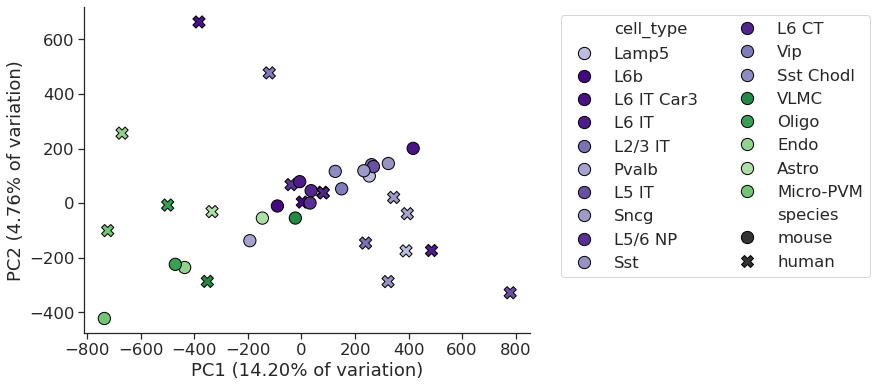

In [181]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming proj_2d is your PCA projection data and pca is your PCA object
df_proj_2d = pd.DataFrame(proj_2d, columns=['PC1', 'PC2'])

# Access explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Adding subclass and cell_type columns
#df_proj_2d['subclass'] = [class2_dict[x] for x in df_layer.index.tolist()]
df_proj_2d['subclass'] = [class2_dict[x.split('_hic')[0]] for x in df_layer.index.tolist()]
df_proj_2d['cell_type'] = df_layer.index.tolist()
df_proj_2d = df_proj_2d.sort_values(by=['subclass'])
df_proj_2d['species'] = ['human' if x.split('_')[-1]=='hic' else 'mouse' for x in df_proj_2d['cell_type'].tolist()]
df_proj_2d['cell_type'] = [x.split('_hic')[0] for x in df_proj_2d['cell_type'].tolist()]
#df_proj_2d['cell_n'] = [compress_name_dict[x] for x in df_proj_2d['cell_type'].tolist()]

# Define your own subclass-to-color mapping
subclass_color_dict = {
    'N': 'blueviolet',  # Blue
    'NN': '#2ca02c',  # Orange
    'heart': 'red',  # Green
    'blood': 'red',  # Green
    # Add more subclasses and their corresponding colors here
}
subclass_color_dict.update(color_map_n)
subclass_color_dict.update(color_map_nn)
subclass_color_dict.update(color_map_bl)
subclass_color_dict.update(color_map_ht)
#subclass_color_dict.update(color_map_IT)
#subclass_color_dict.update(color_map_nIT)
# Plotting
plt.figure(figsize=(8, 6))

ax = sns.scatterplot(
    x='PC1',
    y='PC2',
    hue='cell_type',
    data=df_proj_2d,
    s=150,
    linewidth=1,
    edgecolor='black',
    style='species',
    
    palette=subclass_color_dict,  # Use the custom color palette
)

# Add text labels with adjusted positions to reduce overlap
#for i, row in df_proj_2d.iterrows():
#    plt.text(row['PC1'], row['PC2'], row['cell_n'], fontsize=8, ha='right')
    
# Initialize list to store labeled point positions
labeled_points = []

#Add text labels with adjusted positions to reduce overlap
for i, row in df_proj_2d.iterrows():
    # Define offset values based on the scale of the plot and density of points
    x_offset = 10
    y_offset = -30
    # Check if label overlaps with any existing label
    while any(abs(row[0] - x) < x_offset and abs(row[1] - y) < y_offset for x, y, _ in labeled_points):
        x_offset += 5
        y_offset += 5
    # Add label to the plot with adjusted positions
    #plt.text(row[0] + x_offset, row[1] + y_offset, str(row['cell_type']), fontsize=12, ha='right',va='baseline')
    # Record labeled point to avoid overlapping
    #labeled_points.append((row[0] + x_offset, row[1] + y_offset, row['cell_n']))
#sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

# Set labels for axes
ax.set_xlabel(f'PC1 ({explained_variance_ratio[0]*100:.2f}% of variation)')
ax.set_ylabel(f'PC2 ({explained_variance_ratio[1]*100:.2f}% of variation)')

# Add a title to the plot
#plt.title('PCA Projection')

# Move the legend outside the plot
plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left',ncol=2)

# Add gridlines for better readability
plt.grid(False)

# Show the plot
#plt.show()
#plt.tight_layout()
plt.savefig(f'/home/lohia/{species}_{marker_name}_{drop_duplicates}_{process_type}_pca_cross_species.pdf', transparent=True, bbox_inches='tight')


In [247]:
for process_type in ['inter']:
                for shuf in [False]:
                    for drop_duplicates in [True]:
                        marker_name = 'brain_blood'
                        ice_type='none'
                        resolution='1kbp_raw'
                        species='mouse'
                        input_file_h5ad = f'{base_folder}/hi_c_data_processing/data_{species}/aggregates/{resolution}/max/{marker_name}/mean/hic_gene_{ice_type}_{process_type}_{dist}_{layer_name}_{drop_duplicates}_{shuf}_{marker_name}_{no_of_markers}_by_allbins_max_mean.h5ad'
                        adata_intra = ad.read_h5ad(f'{input_file_h5ad}', backed='r')


In [214]:
adata_intra 

AnnData object with n_obs × n_vars = 24 × 2875012 backed at '/grid/gillis/data_norepl/lohia/hi_c_data_processing/data_human/aggregates/1kbp_raw/max/brain_class/mean/hic_gene_none_inter_0_z_scores_True_False_brain_class_200_by_allbins_max_mean.h5ad'
    layers: 'counts', 'mean'

In [289]:
class4_dict

{'Chandelier': 'N',
 'Lamp5': 'N',
 'Lamp5_Lhx6': 'N',
 'Pax6': 'N',
 'Pvalb': 'N',
 'Sncg': 'N',
 'Sst': 'N',
 'Sst Chodl': 'N',
 'Meis2': 'N',
 'Vip': 'N',
 'L2/3 IT': 'IT',
 'L4 IT': 'IT',
 'L5 ET': 'IT',
 'L5 IT': 'IT',
 'L5 PT': 'IT',
 'L4/5 IT': 'IT',
 'L5/6 NP': 'IT',
 'L6 CT': 'IT',
 'L6 IT': 'IT',
 'L6 IT Car3': 'IT',
 'L6b': 'IT',
 'Astro': 'NN',
 'Endo': 'NN',
 'Micro-PVM': 'NN',
 'OPC': 'NN',
 'Oligo': 'NN',
 'VLMC': 'NN',
 'Peri': 'NN',
 'SMC': 'NN',
 'T cell': 'heart',
 'basophil': 'heart',
 'erythroblast': 'heart',
 'granulocyte': 'heart',
 'hematopoietic precursor cell': 'heart',
 'immature B cell': 'heart',
 'immature natural killer cell': 'heart',
 'late pro-B cell': 'heart',
 'macrophage': 'heart',
 'monocyte': 'heart',
 'naive B cell': 'heart',
 'pro-B cell': 'heart',
 'proerythroblast': 'heart',
 'Adipocytes': 'heart',
 'Cardiomyocytes': 'heart',
 'Endocardial': 'heart',
 'Endothelial_Arterial': 'heart',
 'Endothelial_Capillaries': 'heart',
 'Endothelial_Other': 'h

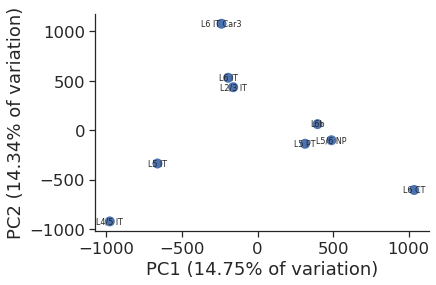

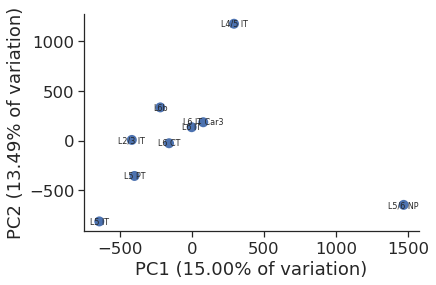

In [631]:
no_of_markers_list = [200]   
for no_of_markers in no_of_markers_list:

    for species in ['mouse']:
        for process_type in ['intra']:
            for resolution in ['1kbp_raw']:
                for shuf in [False]:
                    for drop_duplicates in [False, True]:
                        for marker_name in ['brain_class']:
                            for m_class in ['IT']:
                                dist = 0
                                layer_name = 'z_scores'
                                base_folder = '/grid/gillis/data_norepl/lohia/'
                                SRP_name='aggregates'
                                ice_type='KR'
                                input_file_h5ad = f'{base_folder}/hi_c_data_processing/data_{species}/aggregates/{resolution}/max/{marker_name}/mean/hic_gene_{ice_type}_{process_type}_{dist}_{layer_name}_{drop_duplicates}_{shuf}_{marker_name}_{no_of_markers}_by_allbins_max_mean.h5ad'
                                adata_intra = ad.read_h5ad(f'{input_file_h5ad}', backed='r')
                                df = adata_intra.to_df(layer='mean')
                                #df_layer = df.dropna(axis=1, how='all')
                                #scaler = StandardScaler()
                                #scaler.fit(df_layer)

                                #df_layer_scaled = scaler.transform(df_layer)

                                #df_layer_scaled = df_layer_scaled.fillna(0)
                                #df_layer_scaled = np.nan_to_num(df_layer_scaled, nan=0.0)
                                df_dict = pd.DataFrame(list(class4_dict.items()), columns=['name', 'subclass'])
                                #df = df[df.index.isin(df_dict[df_dict['subclass'].isin([m_class])]['name'].tolist())]
                                df_layer = df.dropna(axis=1, how='all')
                                scaler = StandardScaler()
                                scaler.fit(df_layer)

                                df_layer_scaled = scaler.transform(df_layer)

                                #df_layer_scaled = df_layer_scaled.fillna(0)
                                df_layer_scaled = np.nan_to_num(df_layer_scaled, nan=0.0)

                                pca = PCA(n_components=2, random_state=1)
                                proj_2d = pca.fit_transform(df_layer_scaled)
                                #proj_2d = pca.fit_transform(R1)
                                #umap_2d = UMAP(n_components=2, init='random', random_state=10)
                                #proj_2d = umap_2d.fit_transform(features_sc)

                                df_proj_2d = pd.DataFrame(proj_2d, columns=['PC1', 'PC2'])

                                # Access explained variance ratio
                                explained_variance_ratio = pca.explained_variance_ratio_

                                df_proj_2d['subclass'] = [class4_dict[x] for x in df_layer.index.tolist()]
                                df_proj_2d['cell_type'] = df_layer.index.tolist()
                                #df_proj_2d = df_proj_2d[df_proj_2d['subclass'].isin(['IT', 'nIT'])]
                                #df_proj_2d = df_proj_2d.sort_values(by=['subclass'])



                                ax = sns.scatterplot(
                                    x=df_proj_2d['PC1'],
                                    y=df_proj_2d['PC2'],
                                    hue=df_proj_2d['subclass'],
                                    s=100,
                                    linewidth=0, 
                                    legend=False # Remove legend box
                                )
                                # Initialize list to store labeled point positions
                                labeled_points = []

                                # Add text labels with adjusted positions to reduce overlap
                                for i, row in df_proj_2d.iterrows():
                                    # Define offset values based on the scale of the plot and density of points
                                    x_offset = 0
                                    y_offset = 0
                                    # Check if label overlaps with any existing label
                                    #while any(abs(row[0] - x) < x_offset and abs(row[1] - y) < y_offset for x, y, _ in labeled_points):
                                    #    x_offset += 10
                                    #    y_offset += 10
                                    # Add label to the plot with adjusted positions
                                    plt.text(row[0] + x_offset, row[1] + y_offset, str(row['cell_type']), fontsize=8, ha='center', va='center')
                                    # Record labeled point to avoid overlapping
                                    labeled_points.append((row[0] + x_offset, row[1] + y_offset, row['cell_type']))
                                #sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

                                ax.set_xlabel(f'PC1 ({explained_variance_ratio[0]*100:.2f}% of variation)')
                                ax.set_ylabel(f'PC2 ({explained_variance_ratio[1]*100:.2f}% of variation)')
                                
                                plt.savefig(f'/home/lohia/{species}_{m_class}_{marker_name}_{drop_duplicates}_{process_type}_pca.pdf', transparent=True, bbox_inches='tight')



                                # Show the plot
                                #plt.show()
                                plt.show()
                                
                                
                                
                                #plt.plot()

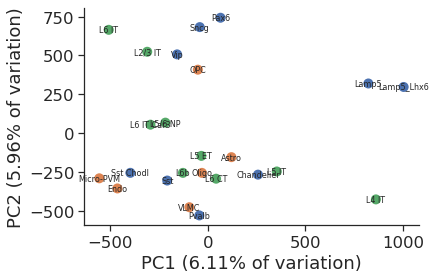

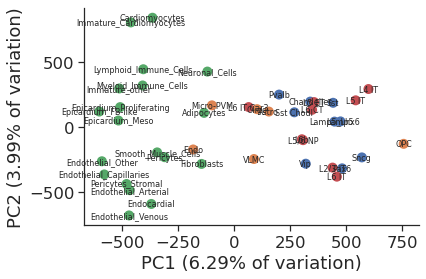

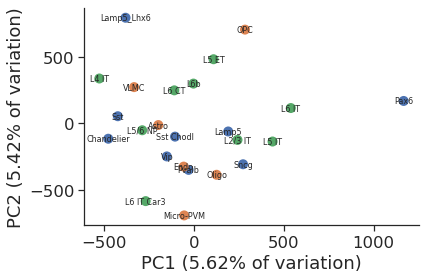

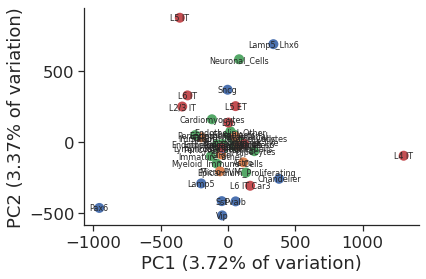

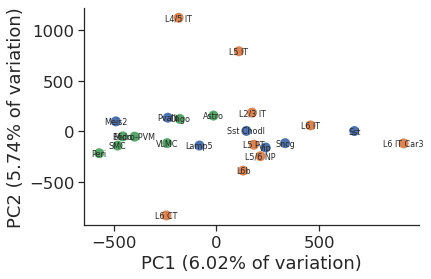

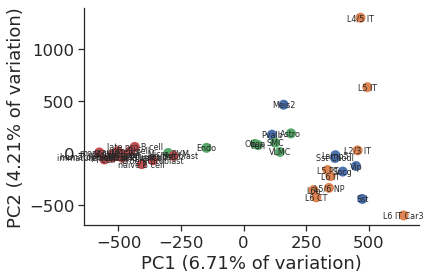

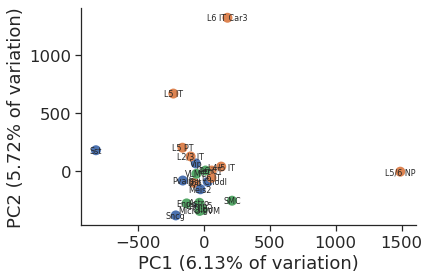

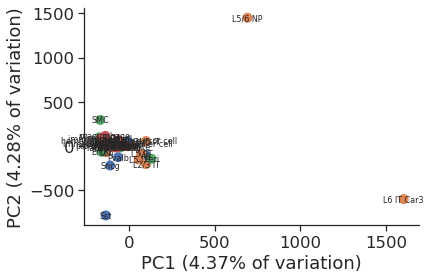

In [652]:
no_of_markers_list = [200]   
for no_of_markers in no_of_markers_list:

    for species in ['human', 'mouse']:
        for process_type in ['intra']:
            for resolution in ['1kbp_raw']:
                for shuf in [False]:
                    for drop_duplicates in [False, True]:
                        if species == 'human':
                            m_l = ['brain_class', 'brain_heart']
                        else:
                            m_l = ['brain_class', 'brain_blood']
                        for marker_name in m_l:
                            for m_class in ['IT']:
                                dist = 0
                                layer_name = 'z_scores'
                                base_folder = '/grid/gillis/data_norepl/lohia/'
                                SRP_name='aggregates'
                                ice_type='KR'
                                input_file_h5ad = f'{base_folder}/hi_c_data_processing/data_{species}/aggregates/{resolution}/max/{marker_name}/mean/hic_gene_{ice_type}_{process_type}_{dist}_{layer_name}_{drop_duplicates}_{shuf}_{marker_name}_{no_of_markers}_by_allbins_max_mean.h5ad'
                                adata_intra = ad.read_h5ad(f'{input_file_h5ad}', backed='r')
                                df = adata_intra.to_df(layer='mean')
                                #df_layer = df.dropna(axis=1, how='all')
                                #scaler = StandardScaler()
                                #scaler.fit(df_layer)

                                #df_layer_scaled = scaler.transform(df_layer)

                                #df_layer_scaled = df_layer_scaled.fillna(0)
                                #df_layer_scaled = np.nan_to_num(df_layer_scaled, nan=0.0)
                                df_dict = pd.DataFrame(list(class4_dict.items()), columns=['name', 'subclass'])
                                #df = df[df.index.isin(df_dict[df_dict['subclass'].isin([m_class])]['name'].tolist())]
                                df_layer = df.dropna(axis=1, how='all')
                                scaler = StandardScaler()
                                scaler.fit(df_layer)

                                df_layer_scaled = scaler.transform(df_layer)

                                #df_layer_scaled = df_layer_scaled.fillna(0)
                                df_layer_scaled = np.nan_to_num(df_layer_scaled, nan=0.0)

                                pca = PCA(n_components=2, random_state=1)
                                proj_2d = pca.fit_transform(df_layer_scaled)
                                #proj_2d = pca.fit_transform(R1)
                                #umap_2d = UMAP(n_components=2, init='random', random_state=10)
                                #proj_2d = umap_2d.fit_transform(features_sc)

                                df_proj_2d = pd.DataFrame(proj_2d, columns=['PC1', 'PC2'])

                                # Access explained variance ratio
                                explained_variance_ratio = pca.explained_variance_ratio_

                                df_proj_2d['subclass'] = [class4_dict[x] for x in df_layer.index.tolist()]
                                df_proj_2d['cell_type'] = df_layer.index.tolist()
                                #df_proj_2d = df_proj_2d[df_proj_2d['subclass'].isin(['IT', 'nIT'])]
                                #df_proj_2d = df_proj_2d.sort_values(by=['subclass'])



                                ax = sns.scatterplot(
                                    x=df_proj_2d['PC1'],
                                    y=df_proj_2d['PC2'],
                                    hue=df_proj_2d['subclass'],
                                    s=100,
                                    linewidth=0, 
                                    legend=False # Remove legend box
                                )
                                # Initialize list to store labeled point positions
                                labeled_points = []

                                # Add text labels with adjusted positions to reduce overlap
                                for i, row in df_proj_2d.iterrows():
                                    # Define offset values based on the scale of the plot and density of points
                                    x_offset = 0
                                    y_offset = 0
                                    # Check if label overlaps with any existing label
                                    #while any(abs(row[0] - x) < x_offset and abs(row[1] - y) < y_offset for x, y, _ in labeled_points):
                                    #    x_offset += 10
                                    #    y_offset += 10
                                    # Add label to the plot with adjusted positions
                                    plt.text(row[0] + x_offset, row[1] + y_offset, str(row['cell_type']), fontsize=8, ha='center', va='center')
                                    # Record labeled point to avoid overlapping
                                    labeled_points.append((row[0] + x_offset, row[1] + y_offset, row['cell_type']))
                                #sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

                                ax.set_xlabel(f'PC1 ({explained_variance_ratio[0]*100:.2f}% of variation)')
                                ax.set_ylabel(f'PC2 ({explained_variance_ratio[1]*100:.2f}% of variation)')
                                
                                plt.savefig(f'/home/lohia/{species}_{m_class}_{marker_name}_{drop_duplicates}_{process_type}_pca.pdf', transparent=True, bbox_inches='tight')



                                # Show the plot
                                #plt.show()
                                plt.show()
                                
                                
                                
                                #plt.plot()

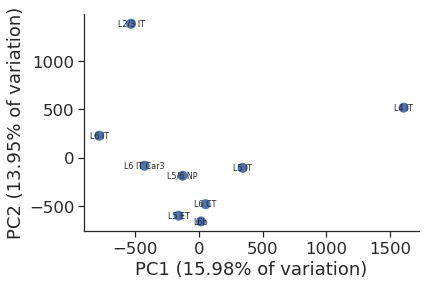

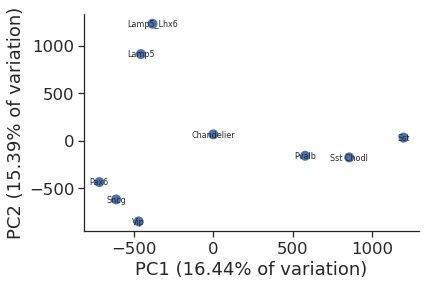

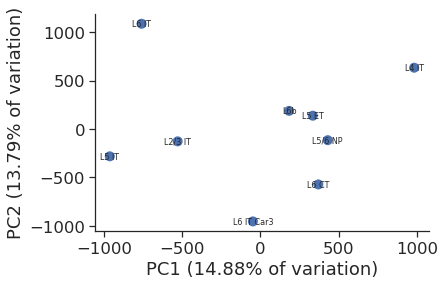

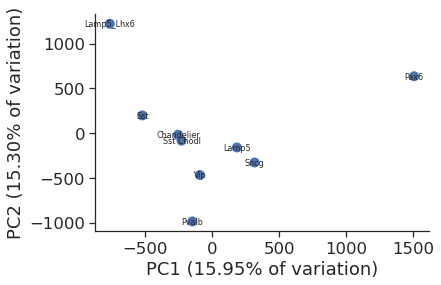

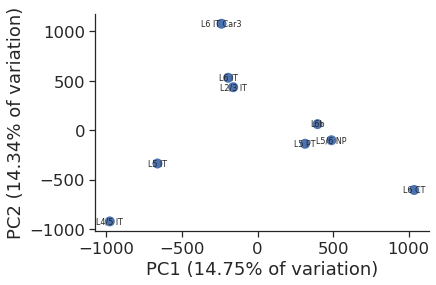

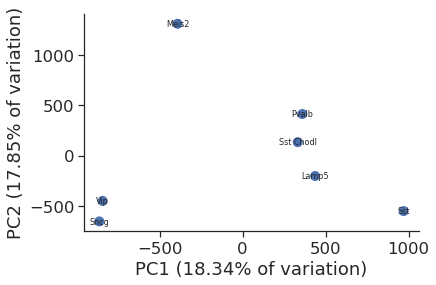

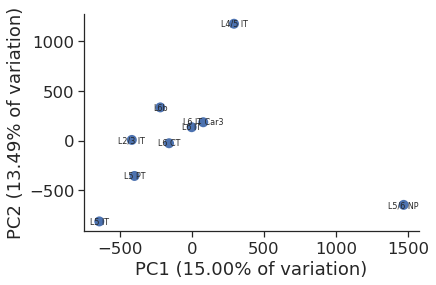

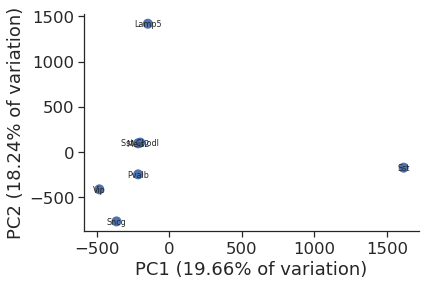

In [653]:
no_of_markers_list = [200]   
for no_of_markers in no_of_markers_list:

    for species in ['human', 'mouse']:
        for process_type in ['intra']:
            for resolution in ['1kbp_raw']:
                for shuf in [False]:
                    for drop_duplicates in [False, True]:
                        if species == 'human':
                            m_l = ['brain_class']
                        else:
                            m_l = ['brain_class']
                        for marker_name in m_l:
                            for m_class in ['IT', 'N']:
                                dist = 0
                                layer_name = 'z_scores'
                                base_folder = '/grid/gillis/data_norepl/lohia/'
                                SRP_name='aggregates'
                                ice_type='KR'
                                input_file_h5ad = f'{base_folder}/hi_c_data_processing/data_{species}/aggregates/{resolution}/max/{marker_name}/mean/hic_gene_{ice_type}_{process_type}_{dist}_{layer_name}_{drop_duplicates}_{shuf}_{marker_name}_{no_of_markers}_by_allbins_max_mean.h5ad'
                                adata_intra = ad.read_h5ad(f'{input_file_h5ad}', backed='r')
                                df = adata_intra.to_df(layer='mean')
                                #df_layer = df.dropna(axis=1, how='all')
                                #scaler = StandardScaler()
                                #scaler.fit(df_layer)

                                #df_layer_scaled = scaler.transform(df_layer)

                                #df_layer_scaled = df_layer_scaled.fillna(0)
                                #df_layer_scaled = np.nan_to_num(df_layer_scaled, nan=0.0)
                                df_dict = pd.DataFrame(list(class4_dict.items()), columns=['name', 'subclass'])
                                df = df[df.index.isin(df_dict[df_dict['subclass'].isin([m_class])]['name'].tolist())]
                                df_layer = df.dropna(axis=1, how='all')
                                scaler = StandardScaler()
                                scaler.fit(df_layer)

                                df_layer_scaled = scaler.transform(df_layer)

                                #df_layer_scaled = df_layer_scaled.fillna(0)
                                df_layer_scaled = np.nan_to_num(df_layer_scaled, nan=0.0)

                                pca = PCA(n_components=2, random_state=1)
                                proj_2d = pca.fit_transform(df_layer_scaled)
                                #proj_2d = pca.fit_transform(R1)
                                #umap_2d = UMAP(n_components=2, init='random', random_state=10)
                                #proj_2d = umap_2d.fit_transform(features_sc)

                                df_proj_2d = pd.DataFrame(proj_2d, columns=['PC1', 'PC2'])

                                # Access explained variance ratio
                                explained_variance_ratio = pca.explained_variance_ratio_

                                df_proj_2d['subclass'] = [class4_dict[x] for x in df_layer.index.tolist()]
                                df_proj_2d['cell_type'] = df_layer.index.tolist()
                                #df_proj_2d = df_proj_2d[df_proj_2d['subclass'].isin(['IT', 'nIT'])]
                                #df_proj_2d = df_proj_2d.sort_values(by=['subclass'])



                                ax = sns.scatterplot(
                                    x=df_proj_2d['PC1'],
                                    y=df_proj_2d['PC2'],
                                    hue=df_proj_2d['subclass'],
                                    s=100,
                                    linewidth=0, 
                                    legend=False # Remove legend box
                                )
                                # Initialize list to store labeled point positions
                                labeled_points = []

                                # Add text labels with adjusted positions to reduce overlap
                                for i, row in df_proj_2d.iterrows():
                                    # Define offset values based on the scale of the plot and density of points
                                    x_offset = 0
                                    y_offset = 0
                                    # Check if label overlaps with any existing label
                                    #while any(abs(row[0] - x) < x_offset and abs(row[1] - y) < y_offset for x, y, _ in labeled_points):
                                    #    x_offset += 10
                                    #    y_offset += 10
                                    # Add label to the plot with adjusted positions
                                    plt.text(row[0] + x_offset, row[1] + y_offset, str(row['cell_type']), fontsize=8, ha='center', va='center')
                                    # Record labeled point to avoid overlapping
                                    labeled_points.append((row[0] + x_offset, row[1] + y_offset, row['cell_type']))
                                #sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

                                ax.set_xlabel(f'PC1 ({explained_variance_ratio[0]*100:.2f}% of variation)')
                                ax.set_ylabel(f'PC2 ({explained_variance_ratio[1]*100:.2f}% of variation)')
                                
                                plt.savefig(f'/home/lohia/{species}_{m_class}_{marker_name}_{drop_duplicates}_{process_type}_pca.pdf', transparent=True, bbox_inches='tight')



                                # Show the plot
                                #plt.show()
                                plt.show()
                                
                                
                                
                                #plt.plot()

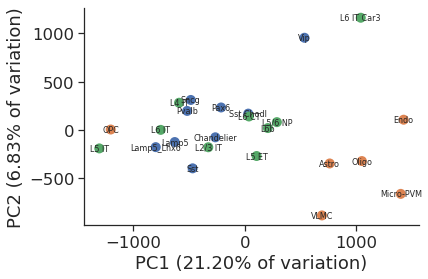

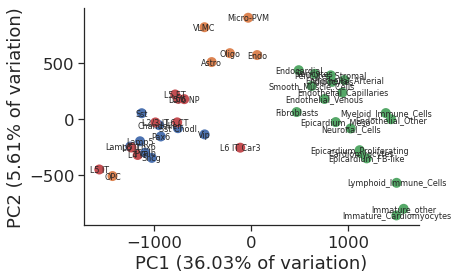

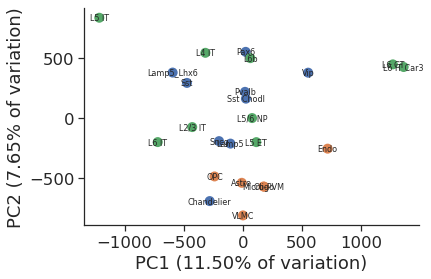

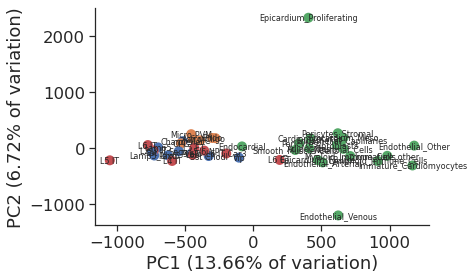

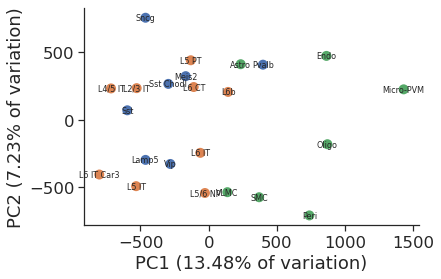

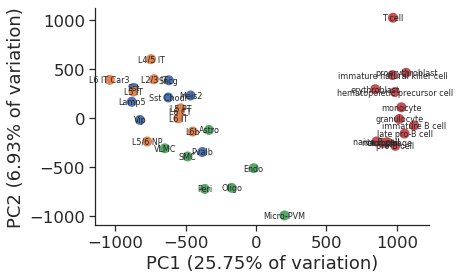

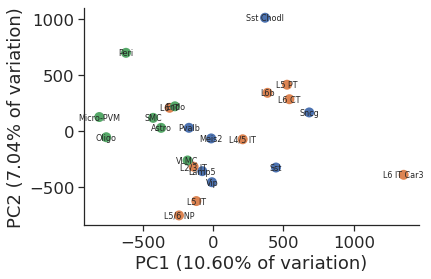

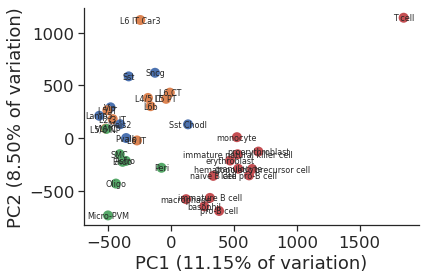

In [649]:
no_of_markers_list = [200]   
for no_of_markers in no_of_markers_list:

    for species in ['human', 'mouse']:
        for process_type in ['inter']:
            for resolution in ['1kbp_raw']:
                for shuf in [False]:
                    for drop_duplicates in [False, True]:
                        if species == 'human':
                            m_l = ['brain_class', 'brain_heart']
                        else:
                            m_l = ['brain_class', 'brain_blood']
                        for marker_name in m_l:
                            for m_class in ['IT']:
                                dist = 0
                                layer_name = 'z_scores'
                                base_folder = '/grid/gillis/data_norepl/lohia/'
                                SRP_name='aggregates'
                                ice_type='none'
                                input_file_h5ad = f'{base_folder}/hi_c_data_processing/data_{species}/aggregates/{resolution}/max/{marker_name}/mean/hic_gene_{ice_type}_{process_type}_{dist}_{layer_name}_{drop_duplicates}_{shuf}_{marker_name}_{no_of_markers}_by_allbins_max_mean.h5ad'
                                adata_intra = ad.read_h5ad(f'{input_file_h5ad}', backed='r')
                                df = adata_intra.to_df(layer='mean')
                                #df_layer = df.dropna(axis=1, how='all')
                                #scaler = StandardScaler()
                                #scaler.fit(df_layer)

                                #df_layer_scaled = scaler.transform(df_layer)

                                #df_layer_scaled = df_layer_scaled.fillna(0)
                                #df_layer_scaled = np.nan_to_num(df_layer_scaled, nan=0.0)
                                df_dict = pd.DataFrame(list(class4_dict.items()), columns=['name', 'subclass'])
                                #df = df[df.index.isin(df_dict[df_dict['subclass'].isin([m_class])]['name'].tolist())]
                                df_layer = df.dropna(axis=1, how='all')
                                scaler = StandardScaler()
                                scaler.fit(df_layer)

                                df_layer_scaled = scaler.transform(df_layer)

                                #df_layer_scaled = df_layer_scaled.fillna(0)
                                df_layer_scaled = np.nan_to_num(df_layer_scaled, nan=0.0)

                                pca = PCA(n_components=2, random_state=1)
                                proj_2d = pca.fit_transform(df_layer_scaled)
                                #proj_2d = pca.fit_transform(R1)
                                #umap_2d = UMAP(n_components=2, init='random', random_state=10)
                                #proj_2d = umap_2d.fit_transform(features_sc)

                                df_proj_2d = pd.DataFrame(proj_2d, columns=['PC1', 'PC2'])

                                # Access explained variance ratio
                                explained_variance_ratio = pca.explained_variance_ratio_

                                df_proj_2d['subclass'] = [class4_dict[x] for x in df_layer.index.tolist()]
                                df_proj_2d['cell_type'] = df_layer.index.tolist()
                                #df_proj_2d = df_proj_2d[df_proj_2d['subclass'].isin(['IT', 'nIT'])]
                                #df_proj_2d = df_proj_2d.sort_values(by=['subclass'])



                                ax = sns.scatterplot(
                                    x=df_proj_2d['PC1'],
                                    y=df_proj_2d['PC2'],
                                    hue=df_proj_2d['subclass'],
                                    s=100,
                                    linewidth=0, 
                                    legend=False # Remove legend box
                                )
                                # Initialize list to store labeled point positions
                                labeled_points = []

                                # Add text labels with adjusted positions to reduce overlap
                                for i, row in df_proj_2d.iterrows():
                                    # Define offset values based on the scale of the plot and density of points
                                    x_offset = 0
                                    y_offset = 0
                                    # Check if label overlaps with any existing label
                                    #while any(abs(row[0] - x) < x_offset and abs(row[1] - y) < y_offset for x, y, _ in labeled_points):
                                    #    x_offset += 10
                                    #    y_offset += 10
                                    # Add label to the plot with adjusted positions
                                    plt.text(row[0] + x_offset, row[1] + y_offset, str(row['cell_type']), fontsize=8, ha='center', va='center')
                                    # Record labeled point to avoid overlapping
                                    labeled_points.append((row[0] + x_offset, row[1] + y_offset, row['cell_type']))
                                #sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

                                ax.set_xlabel(f'PC1 ({explained_variance_ratio[0]*100:.2f}% of variation)')
                                ax.set_ylabel(f'PC2 ({explained_variance_ratio[1]*100:.2f}% of variation)')
                                
                                plt.savefig(f'/home/lohia/{species}_{m_class}_{marker_name}_{drop_duplicates}_{process_type}_pca.pdf', transparent=True, bbox_inches='tight')



                                # Show the plot
                                #plt.show()
                                plt.show()
                                
                                
                                
                                #plt.plot()

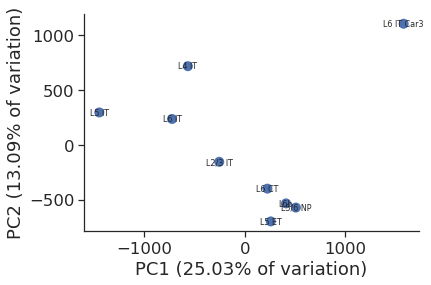

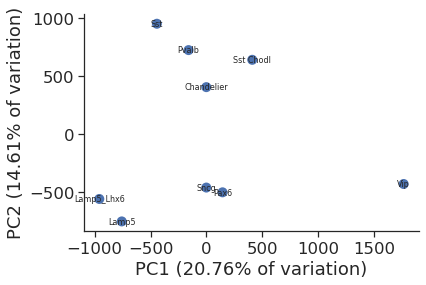

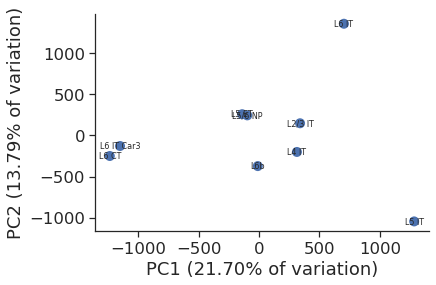

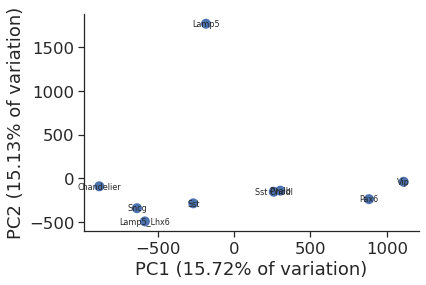

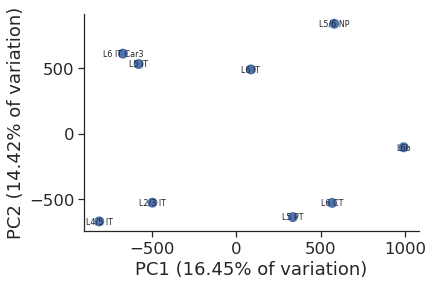

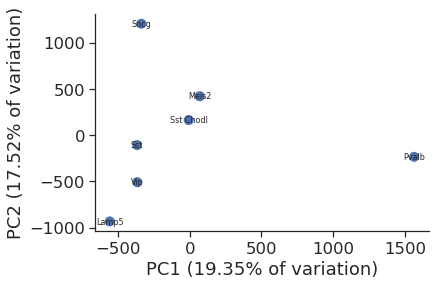

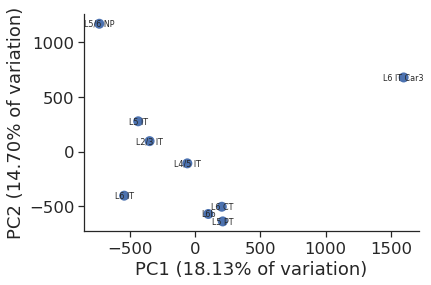

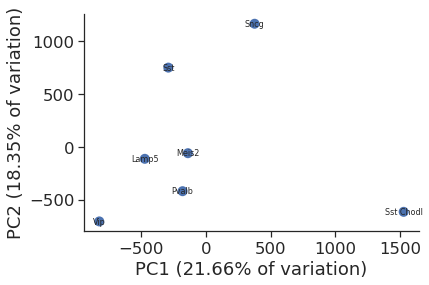

In [651]:
no_of_markers_list = [200]   
for no_of_markers in no_of_markers_list:

    for species in ['human', 'mouse']:
        for process_type in ['inter']:
            for resolution in ['1kbp_raw']:
                for shuf in [False]:
                    for drop_duplicates in [False, True]:
                        if species == 'human':
                            m_l = ['brain_class']
                        else:
                            m_l = ['brain_class']
                        for marker_name in m_l:
                            for m_class in ['IT', 'N']:
                                dist = 0
                                layer_name = 'z_scores'
                                base_folder = '/grid/gillis/data_norepl/lohia/'
                                SRP_name='aggregates'
                                ice_type='none'
                                input_file_h5ad = f'{base_folder}/hi_c_data_processing/data_{species}/aggregates/{resolution}/max/{marker_name}/mean/hic_gene_{ice_type}_{process_type}_{dist}_{layer_name}_{drop_duplicates}_{shuf}_{marker_name}_{no_of_markers}_by_allbins_max_mean.h5ad'
                                adata_intra = ad.read_h5ad(f'{input_file_h5ad}', backed='r')
                                df = adata_intra.to_df(layer='mean')
                                #df_layer = df.dropna(axis=1, how='all')
                                #scaler = StandardScaler()
                                #scaler.fit(df_layer)

                                #df_layer_scaled = scaler.transform(df_layer)

                                #df_layer_scaled = df_layer_scaled.fillna(0)
                                #df_layer_scaled = np.nan_to_num(df_layer_scaled, nan=0.0)
                                df_dict = pd.DataFrame(list(class4_dict.items()), columns=['name', 'subclass'])
                                df = df[df.index.isin(df_dict[df_dict['subclass'].isin([m_class])]['name'].tolist())]
                                df_layer = df.dropna(axis=1, how='all')
                                scaler = StandardScaler()
                                scaler.fit(df_layer)

                                df_layer_scaled = scaler.transform(df_layer)

                                #df_layer_scaled = df_layer_scaled.fillna(0)
                                df_layer_scaled = np.nan_to_num(df_layer_scaled, nan=0.0)

                                pca = PCA(n_components=2, random_state=1)
                                proj_2d = pca.fit_transform(df_layer_scaled)
                                #proj_2d = pca.fit_transform(R1)
                                #umap_2d = UMAP(n_components=2, init='random', random_state=10)
                                #proj_2d = umap_2d.fit_transform(features_sc)

                                df_proj_2d = pd.DataFrame(proj_2d, columns=['PC1', 'PC2'])

                                # Access explained variance ratio
                                explained_variance_ratio = pca.explained_variance_ratio_

                                df_proj_2d['subclass'] = [class4_dict[x] for x in df_layer.index.tolist()]
                                df_proj_2d['cell_type'] = df_layer.index.tolist()
                                #df_proj_2d = df_proj_2d[df_proj_2d['subclass'].isin(['IT', 'nIT'])]
                                #df_proj_2d = df_proj_2d.sort_values(by=['subclass'])



                                ax = sns.scatterplot(
                                    x=df_proj_2d['PC1'],
                                    y=df_proj_2d['PC2'],
                                    hue=df_proj_2d['subclass'],
                                    s=100,
                                    linewidth=0, 
                                    legend=False # Remove legend box
                                )
                                # Initialize list to store labeled point positions
                                labeled_points = []

                                # Add text labels with adjusted positions to reduce overlap
                                for i, row in df_proj_2d.iterrows():
                                    # Define offset values based on the scale of the plot and density of points
                                    x_offset = 0
                                    y_offset = 0
                                    # Check if label overlaps with any existing label
                                    #while any(abs(row[0] - x) < x_offset and abs(row[1] - y) < y_offset for x, y, _ in labeled_points):
                                    #    x_offset += 10
                                    #    y_offset += 10
                                    # Add label to the plot with adjusted positions
                                    plt.text(row[0] + x_offset, row[1] + y_offset, str(row['cell_type']), fontsize=8, ha='center', va='center')
                                    # Record labeled point to avoid overlapping
                                    labeled_points.append((row[0] + x_offset, row[1] + y_offset, row['cell_type']))
                                #sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

                                ax.set_xlabel(f'PC1 ({explained_variance_ratio[0]*100:.2f}% of variation)')
                                ax.set_ylabel(f'PC2 ({explained_variance_ratio[1]*100:.2f}% of variation)')
                                
                                plt.savefig(f'/home/lohia/{species}_{m_class}_{marker_name}_{drop_duplicates}_{process_type}_pca.pdf', transparent=True, bbox_inches='tight')



                                # Show the plot
                                #plt.show()
                                plt.show()
                                
                                
                                
                                #plt.plot()

In [ ]:
no_of_markers_list = [200]   
for no_of_markers in no_of_markers_list:

    for species in ['human', 'mouse']:
        for process_type in ['inter']:
            for resolution in ['1kbp_raw']:
                for shuf in [False]:
                    for drop_duplicates in [False, True]:
                        if species == 'human':
                            m_l = ['brain_class']
                        else:
                            m_l = ['brain_class']
                        for marker_name in m_l:
                            for m_class in ['IT']:
                                dist = 0
                                layer_name = 'z_scores'
                                base_folder = '/grid/gillis/data_norepl/lohia/'
                                SRP_name='aggregates'
                                ice_type='none'
                                input_file_h5ad = f'{base_folder}/hi_c_data_processing/data_{species}/aggregates/{resolution}/max/{marker_name}/mean/hic_gene_{ice_type}_{process_type}_{dist}_{layer_name}_{drop_duplicates}_{shuf}_{marker_name}_{no_of_markers}_by_allbins_max_mean.h5ad'
                                adata_intra = ad.read_h5ad(f'{input_file_h5ad}', backed='r')
                                df = adata_intra.to_df(layer='mean')
                                #df_layer = df.dropna(axis=1, how='all')
                                #scaler = StandardScaler()
                                #scaler.fit(df_layer)

                                #df_layer_scaled = scaler.transform(df_layer)

                                #df_layer_scaled = df_layer_scaled.fillna(0)
                                #df_layer_scaled = np.nan_to_num(df_layer_scaled, nan=0.0)
                                df_dict = pd.DataFrame(list(class4_dict.items()), columns=['name', 'subclass'])
                                #df = df[df.index.isin(df_dict[df_dict['subclass'].isin([m_class])]['name'].tolist())]
                                df_layer = df.dropna(axis=1, how='all')
                                scaler = StandardScaler()
                                scaler.fit(df_layer)

                                df_layer_scaled = scaler.transform(df_layer)

                                #df_layer_scaled = df_layer_scaled.fillna(0)
                                df_layer_scaled = np.nan_to_num(df_layer_scaled, nan=0.0)

                                pca = PCA(n_components=2, random_state=1)
                                proj_2d = pca.fit_transform(df_layer_scaled)
                                #proj_2d = pca.fit_transform(R1)
                                #umap_2d = UMAP(n_components=2, init='random', random_state=10)
                                #proj_2d = umap_2d.fit_transform(features_sc)

                                df_proj_2d = pd.DataFrame(proj_2d, columns=['PC1', 'PC2'])

                                # Access explained variance ratio
                                explained_variance_ratio = pca.explained_variance_ratio_

                                df_proj_2d['subclass'] = [class4_dict[x] for x in df_layer.index.tolist()]
                                df_proj_2d['cell_type'] = df_layer.index.tolist()
                                #df_proj_2d = df_proj_2d[df_proj_2d['subclass'].isin(['IT', 'nIT'])]
                                #df_proj_2d = df_proj_2d.sort_values(by=['subclass'])



                                ax = sns.scatterplot(
                                    x=df_proj_2d['PC1'],
                                    y=df_proj_2d['PC2'],
                                    hue=df_proj_2d['subclass'],
                                    s=100,
                                    linewidth=0, 
                                    legend=False # Remove legend box
                                )
                                # Initialize list to store labeled point positions
                                labeled_points = []

                                # Add text labels with adjusted positions to reduce overlap
                                for i, row in df_proj_2d.iterrows():
                                    # Define offset values based on the scale of the plot and density of points
                                    x_offset = 0
                                    y_offset = 0
                                    # Check if label overlaps with any existing label
                                    #while any(abs(row[0] - x) < x_offset and abs(row[1] - y) < y_offset for x, y, _ in labeled_points):
                                    #    x_offset += 10
                                    #    y_offset += 10
                                    # Add label to the plot with adjusted positions
                                    plt.text(row[0] + x_offset, row[1] + y_offset, str(row['cell_type']), fontsize=8, ha='center', va='center')
                                    # Record labeled point to avoid overlapping
                                    labeled_points.append((row[0] + x_offset, row[1] + y_offset, row['cell_type']))
                                #sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

                                ax.set_xlabel(f'PC1 ({explained_variance_ratio[0]*100:.2f}% of variation)')
                                ax.set_ylabel(f'PC2 ({explained_variance_ratio[1]*100:.2f}% of variation)')
                                
                                plt.savefig(f'/home/lohia/{species}_{m_class}_{marker_name}_{drop_duplicates}_{process_type}_pca.pdf', transparent=True, bbox_inches='tight')



                                # Show the plot
                                #plt.show()
                                plt.show()
                                
                                
                                
                                #plt.plot()

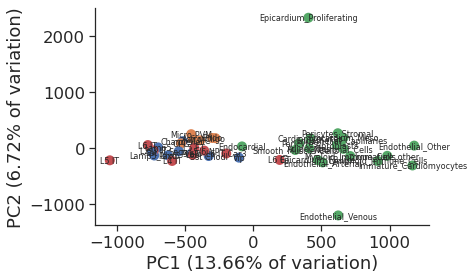

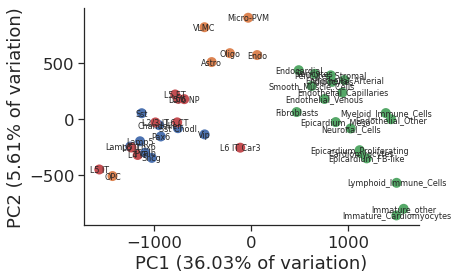

In [298]:
no_of_markers_list = [200]   
for no_of_markers in no_of_markers_list:

    for species in ['human']:
        for process_type in ['inter']:
            for resolution in ['1kbp_raw']:
                for shuf in [False]:
                    for drop_duplicates in [True, False]:
                        for marker_name in ['brain_heart']:
                            for m_class in ['IT']:
                                dist = 0
                                layer_name = 'z_scores'
                                base_folder = '/grid/gillis/data_norepl/lohia/'
                                SRP_name='aggregates'
                                ice_type='none'
                                input_file_h5ad = f'{base_folder}/hi_c_data_processing/data_{species}/aggregates/{resolution}/max/{marker_name}/mean/hic_gene_{ice_type}_{process_type}_{dist}_{layer_name}_{drop_duplicates}_{shuf}_{marker_name}_{no_of_markers}_by_allbins_max_mean.h5ad'
                                adata_intra = ad.read_h5ad(f'{input_file_h5ad}', backed='r')
                                df = adata_intra.to_df(layer='mean')
                                #df_layer = df.dropna(axis=1, how='all')
                                #scaler = StandardScaler()
                                #scaler.fit(df_layer)

                                #df_layer_scaled = scaler.transform(df_layer)

                                #df_layer_scaled = df_layer_scaled.fillna(0)
                                #df_layer_scaled = np.nan_to_num(df_layer_scaled, nan=0.0)
                                df_dict = pd.DataFrame(list(class4_dict.items()), columns=['name', 'subclass'])
                                #df = df[df.index.isin(df_dict[df_dict['subclass'].isin([m_class])]['name'].tolist())]
                                df_layer = df.dropna(axis=1, how='all')
                                scaler = StandardScaler()
                                scaler.fit(df_layer)

                                df_layer_scaled = scaler.transform(df_layer)

                                #df_layer_scaled = df_layer_scaled.fillna(0)
                                df_layer_scaled = np.nan_to_num(df_layer_scaled, nan=0.0)

                                pca = PCA(n_components=2, random_state=1)
                                proj_2d = pca.fit_transform(df_layer_scaled)
                                #proj_2d = pca.fit_transform(R1)
                                #umap_2d = UMAP(n_components=2, init='random', random_state=10)
                                #proj_2d = umap_2d.fit_transform(features_sc)

                                df_proj_2d = pd.DataFrame(proj_2d, columns=['PC1', 'PC2'])

                                # Access explained variance ratio
                                explained_variance_ratio = pca.explained_variance_ratio_

                                df_proj_2d['subclass'] = [class4_dict[x] for x in df_layer.index.tolist()]
                                df_proj_2d['cell_type'] = df_layer.index.tolist()
                                #df_proj_2d = df_proj_2d[df_proj_2d['subclass'].isin(['IT', 'nIT'])]
                                #df_proj_2d = df_proj_2d.sort_values(by=['subclass'])



                                ax = sns.scatterplot(
                                    x=df_proj_2d['PC1'],
                                    y=df_proj_2d['PC2'],
                                    hue=df_proj_2d['subclass'],
                                    s=100,
                                    linewidth=0, 
                                    legend=False # Remove legend box
                                )
                                # Initialize list to store labeled point positions
                                labeled_points = []

                                # Add text labels with adjusted positions to reduce overlap
                                for i, row in df_proj_2d.iterrows():
                                    # Define offset values based on the scale of the plot and density of points
                                    x_offset = 0
                                    y_offset = 0
                                    # Check if label overlaps with any existing label
                                    #while any(abs(row[0] - x) < x_offset and abs(row[1] - y) < y_offset for x, y, _ in labeled_points):
                                    #    x_offset += 10
                                    #    y_offset += 10
                                    # Add label to the plot with adjusted positions
                                    plt.text(row[0] + x_offset, row[1] + y_offset, str(row['cell_type']), fontsize=8, ha='center', va='center')
                                    # Record labeled point to avoid overlapping
                                    labeled_points.append((row[0] + x_offset, row[1] + y_offset, row['cell_type']))
                                #sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

                                ax.set_xlabel(f'PC1 ({explained_variance_ratio[0]*100:.2f}% of variation)')
                                ax.set_ylabel(f'PC2 ({explained_variance_ratio[1]*100:.2f}% of variation)')
                                
                                plt.savefig(f'/home/lohia/{species}_{m_class}_{marker_name}_{drop_duplicates}_{process_type}_pca.pdf', transparent=True, bbox_inches='tight')



                                # Show the plot
                                #plt.show()
                                plt.show()
                                
                                
                                
                                #plt.plot()

In [556]:
no_of_markers_list = [200]     
for no_of_markers in no_of_markers_list:

    for species in ['human']:
        for process_type in ['intra']:
            if species == 'human':
                marker_name_list = ['brain_heart']

            else:
                marker_name_list = ['brain_heart']

            for shuf in [False]:
                for drop_duplicates in [False]:
                    for marker_name in marker_name_list:
                        if process_type == 'KR':
                            resolution_list = [ '1kbp_raw']
                            ice_type='none'
                        else:
                            resolution_list = ['1kbp_raw']
                            ice_type='KR'
                        for resolution in resolution_list:
                            for dist in [0]:
                                layer_name = 'z_scores'
                                base_folder = '/grid/gillis/data_norepl/lohia/'
                                SRP_name='aggregates'

                                
                                if species=='mouse':
                                    gene_annot_file=f'{base_folder}/hi_c_data_processing/genomes_jlee/Mus_musculus.GRCm38.94.gtf.gz'
                                else:
                                    gene_annot_file=f'{base_folder}/hi_c_data_processing/genomes_jlee/gencode.v28.chr_patch_hapl_scaff.annotation.gtf.gz' 
                                #input_file_h5ad = f'{base_folder}/hi_c_data_processing/data_{species}/aggregates/{resolution}/max/hic_gene_{process_type}_{ice_type}_{dist}_{layer_name}_{drop_duplicates}_{shuf}_{marker_name}_{no_of_markers}_by_allbins_max_mean.h5ad'
                                #outputfile_h5ad = f'{base_folder}/hi_c_data_processing/data_{species}/aggregates/{resolution}/max/hic_gene_{process_type}_{ice_type}_{dist}_{layer_name}_{drop_duplicates}_{shuf}_{marker_name}_{no_of_markers}_by_allbins_max_mean.h5ad'
                                outputfile_h5ad = f'{base_folder}/hi_c_data_processing/data_{species}/aggregates/{resolution}/max/{marker_name}/mean/hic_gene_{ice_type}_{process_type}_{dist}_{layer_name}_{drop_duplicates}_{shuf}_{marker_name}_{no_of_markers}_by_allbins_max_mean.h5ad'



In [503]:
snp_pos = pd.read_csv('/grid/gillis/data_norepl/lohia/human_cell_type_eqtl/snp_pos.txt.gz', sep='\t')


snp_pos['chr'] = [x.split(':')[0] for x in snp_pos['SNP_id_hg38']]

snp_pos['bin_st'] = [x.split(':')[1] for x in snp_pos['SNP_id_hg38']]

snp_pos['bin_end'] = snp_pos['bin_st']

snp_pos[['chr', 'bin_st', 'bin_end', 'SNP']].to_csv('/grid/gillis/data_norepl/lohia/human_cell_type_eqtl/snp_pos.bed', sep='\t', header=False, index=False)


os.system(f"bedtools intersect -wo -b /grid/gillis/data_norepl/lohia/human_cell_type_eqtl/snp_pos.bed -a {base_folder}/hi_c_data_processing/data_{species}/{SRP_name}/{resolution}/max/regions_bed_file.tsv > {base_folder}/hi_c_data_processing/data_{species}/{SRP_name}/{resolution}/max/all_bin_snp_position.bed")


0

In [557]:
snp_pos = pd.read_csv(f'{base_folder}/hi_c_data_processing/data_{species}/{SRP_name}/{resolution}/max/all_bin_snp_position.bed', sep='\t', names=['d', 'd1', 'd2', 'bin_id', 'c', 'c1', 'c2', 'SNP', 'c4'] )


In [558]:
snp_pos  = snp_pos.drop_duplicates(['SNP'])

In [559]:


adata = ad.read_h5ad(f'{outputfile_h5ad}', backed='r')

In [560]:
all_dis_snp_list = []
for dfile, dis_name in zip(['Table S5 - SCZ-Table 1.tsv', 'Table S5 - MS-Table 1.tsv', 'Table S5 - AD-Table 1.tsv', 'Table S5 - PD-Table 1.tsv'], ['SCZ', 'MS', 'AD', 'PD']):
    
    

        df_all_eqtl = pd.read_csv(f'/grid/gillis/data_norepl/lohia/human_cell_type_eqtl/cis-eQTLs_results.tsv/{dfile}', sep='\t', skiprows=3)
        df_all_eqtl = df_all_eqtl.drop_duplicates(['GWAS_snp'])
        df_all_eqtl = df_all_eqtl.merge(snp_pos[['bin_id', 'SNP']], left_on='GWAS_snp', right_on='SNP')
        df_all_eqtl['bin_id'] = [f"bin_{i}" for i in df_all_eqtl['bin_id'].tolist()]
        df_all_eqtl = df_all_eqtl.drop_duplicates('bin_id')
        df_all_eqtl['md'] = dis_name
        all_dis_snp_list.append(df_all_eqtl)


In [561]:
all_dis_snp = pd.concat(all_dis_snp_list)

all_dis_snp = all_dis_snp.drop_duplicates('bin_id')

bin_md_dict = dict(zip(all_dis_snp['bin_id'], all_dis_snp['md']))

bins_eqtl = all_dis_snp['bin_id'].tolist()

In [562]:
        dk = adata.to_df(layer='mean')
        #dk = dk.dropna(axis=1)
        my_val=2


        
        

        features = dk.T.reindex(bins_eqtl).T
        features = features.dropna(axis=1)
        
        
        
       

        features['subclass'] = [class2_dict[x] for x in features.index.tolist()]
        #features = features[~features.index.isin(['Immature_other', 'Immature_Cardiomyocytes', 'Pericytes_Stromal', 'Epicardium_FB-like', 'Epicardium_Meso', 'Epicardium_Proliferating', 'Endothelial_Other'])]
        features = features.drop(columns=['subclass'])
        #print (features)

        z_scores = stats.zscore(features, axis=0, nan_policy='omit')

        

In [486]:
        features = pd.melt(features.reset_index(), id_vars='index', var_name='feature', value_name='value')
        
       







                           


        features['subclass'] = [class4_dict[x] for x in features['index'].tolist()]

        features = features.sort_values(by=['subclass'])

        features['disease'] = [bin_md_dict[x] for x in features['feature']]


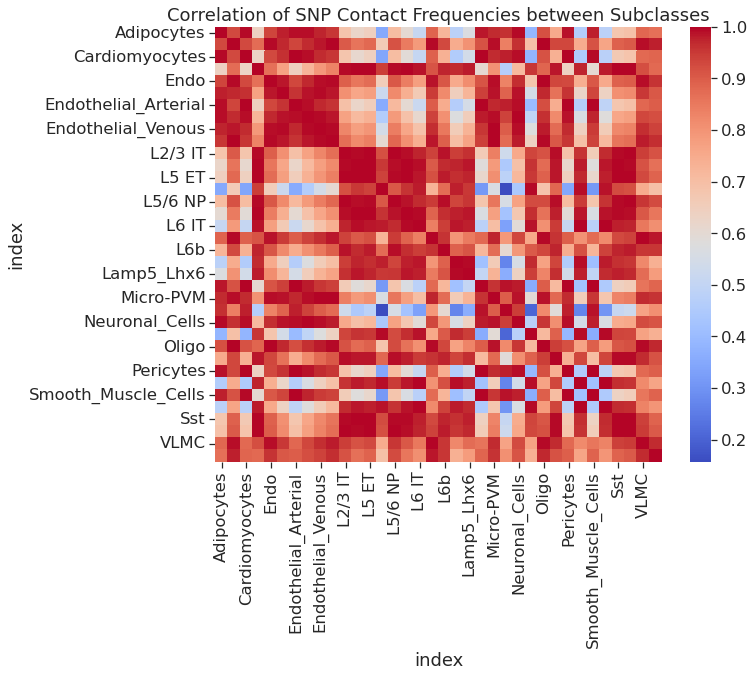

In [365]:
pivot_table = features.pivot_table(index='disease', columns='index', values='value', aggfunc='mean')

# Plotting the heatmap of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table.corr(), annot=False, fmt=".2f", cmap='coolwarm')
plt.title('Correlation of SNP Contact Frequencies between Subclasses')
plt.show()

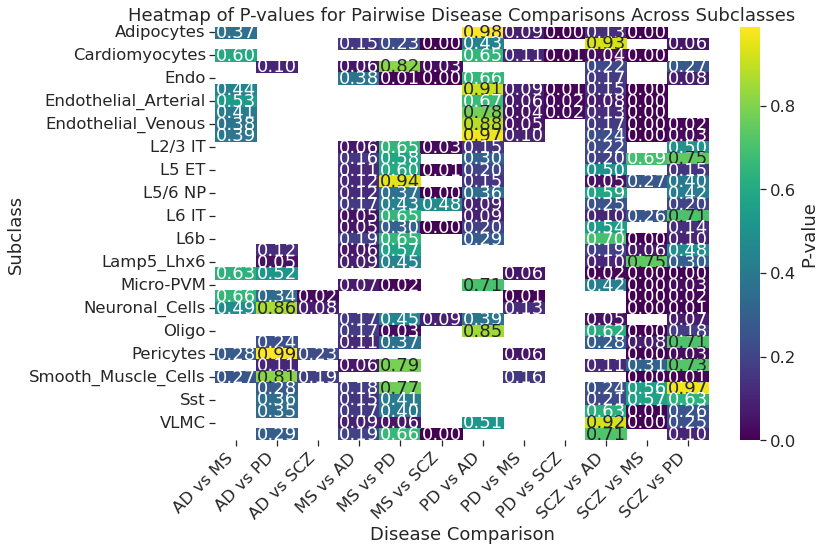

In [487]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# Load your data
#features = pd.read_csv('features.csv')

# Function to perform t-tests between diseases for each subclass
def compare_diseases_within_subclasses(data):
    # Initialize a list to collect all the entries for a new DataFrame
    results_list = []

    # Iterate through each subclass
    for subclass in data['index'].unique():
        subclass_data = data[data['index'] == subclass]
        diseases = subclass_data['disease'].unique()

        if len(diseases) > 1:  # Only perform comparisons if there are at least two diseases
            for i in range(len(diseases)):
                for j in range(i + 1, len(diseases)):
                    disease1 = diseases[i]
                    disease2 = diseases[j]
                    group1 = subclass_data[subclass_data['disease'] == disease1]['value']
                    group2 = subclass_data[subclass_data['disease'] == disease2]['value']

                    # Compute t-test
                    t_stat, p_val = ttest_ind(group1, group2, equal_var=False)  # Welch's t-test
                    results_list.append({
                        'Subclass': subclass,
                        'Comparison': f'{disease1} vs {disease2}',
                        'P-value': p_val
                    })

    # Convert list of dictionaries to DataFrame
    results_df = pd.DataFrame(results_list)
    # Pivot this DataFrame to create a matrix appropriate for a heatmap
    heatmap_df = results_df.pivot("Subclass", "Comparison", "P-value")

    return heatmap_df

# Get data suitable for heatmap
heatmap_data = compare_diseases_within_subclasses(features)

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt=".2f", cbar_kws={'label': 'P-value'})
plt.title('Heatmap of P-values for Pairwise Disease Comparisons Across Subclasses')
plt.xlabel('Disease Comparison')
plt.ylabel('Subclass')
plt.xticks(rotation=45, ha='right')  # Rotate x-labels for better visibility
plt.yticks(rotation=0)  # Ensure subclass labels are horizontal
plt.tight_layout()  # Adjust layout to make room for labels
plt.show()


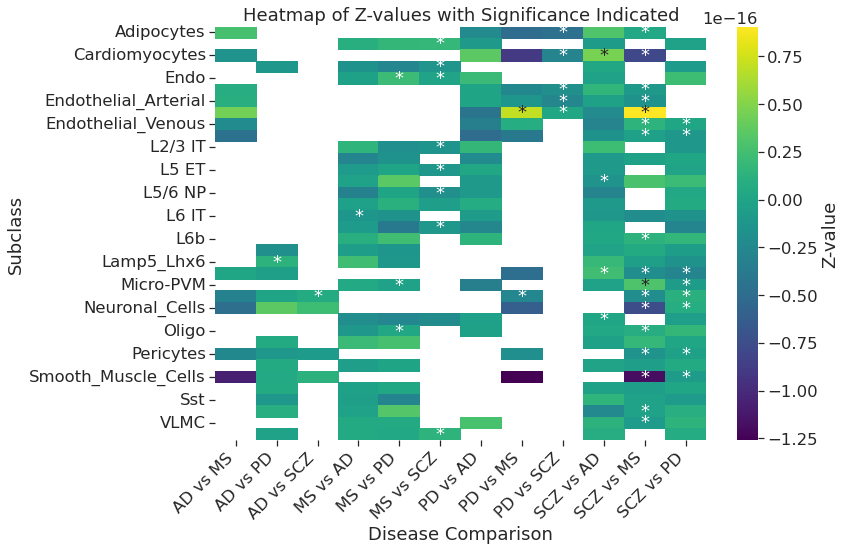

In [488]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, zscore

# Dummy features data, replace with your actual data loading
# features = pd.read_csv('features.csv')

def compare_diseases_within_subclasses(data):
    # Initialize a list to collect all the entries for a new DataFrame
    results_list = []

    # Iterate through each subclass
    for subclass in data['index'].unique():
        subclass_data = data[data['index'] == subclass]
        diseases = subclass_data['disease'].unique()

        if len(diseases) > 1:  # Only perform comparisons if there are at least two diseases
            for i in range(len(diseases)):
                for j in range(i + 1, len(diseases)):
                    disease1 = diseases[i]
                    disease2 = diseases[j]
                    group1 = subclass_data[subclass_data['disease'] == disease1]['value']
                    group2 = subclass_data[subclass_data['disease'] == disease2]['value']

                    # Compute z-score for each group
                    z1 = np.mean(zscore(group1))
                    z2 = np.mean(zscore(group2))

                    # Compute t-test
                    t_stat, p_val = ttest_ind(group1, group2, equal_var=False)  # Welch's t-test

                    # Store results
                    results_list.append({
                        'Subclass': subclass,
                        'Comparison': f'{disease1} vs {disease2}',
                        'Z-value': (z1 + z2) / 2,  # Example aggregation, adjust as needed
                        'P-value': p_val
                    })

    # Convert list of dictionaries to DataFrame
    results_df = pd.DataFrame(results_list)
    # Pivoting to create separate matrices for p-values and z-values
    p_values_df = results_df.pivot("Subclass", "Comparison", "P-value")
    z_values_df = results_df.pivot("Subclass", "Comparison", "Z-value")

    return p_values_df, z_values_df

# Get data suitable for heatmap
p_values, z_values = compare_diseases_within_subclasses(features)

# Create annotations based on p-values
annotations = p_values.applymap(lambda x: '*' if x < 0.05 else '')

# Plotting the heatmap with annotations
plt.figure(figsize=(12, 8))
ax = sns.heatmap(z_values, annot=annotations, cmap='viridis', fmt='', cbar_kws={'label': 'Z-value'})
plt.title('Heatmap of Z-values with Significance Indicated')
plt.xlabel('Disease Comparison')
plt.ylabel('Subclass')
plt.xticks(rotation=45, ha='right')  # Rotate x-labels for better visibility
plt.yticks(rotation=0)  # Ensure subclass labels are horizontal
plt.tight_layout()  # Adjust layout to make room for labels
plt.show()


In [541]:
p_values

Comparison               AD vs MS  AD vs PD  AD vs SCZ  MS vs AD  MS vs PD  \
Subclass                                                                     
Adipocytes               0.371562       NaN        NaN       NaN       NaN   
Astro                         NaN       NaN        NaN  0.154621  0.229953   
Cardiomyocytes           0.599714       NaN        NaN       NaN       NaN   
Chandelier                    NaN  0.096853        NaN  0.057183  0.818265   
Endo                          NaN       NaN        NaN  0.375730  0.012154   
Endocardial              0.437392       NaN        NaN       NaN       NaN   
Endothelial_Arterial     0.529919       NaN        NaN       NaN       NaN   
Endothelial_Capillaries  0.407201       NaN        NaN       NaN       NaN   
Endothelial_Venous       0.378570       NaN        NaN       NaN       NaN   
Fibroblasts              0.393413       NaN        NaN       NaN       NaN   
L2/3 IT                       NaN       NaN        NaN  0.059936  0.647309   
L4 IT                         NaN       NaN        NaN  0.158202  0.581115   
L5 ET                         NaN       NaN        NaN  0.114916  0.597002   
L5 IT                         NaN       NaN        NaN  0.115652  0.943015   
L5/6 NP                       NaN       NaN        NaN  0.118977  0.369753   
L6 CT                         NaN       NaN        NaN  0.169006  0.432719   
L6 IT                         NaN       NaN        NaN  0.046173  0.649904   
L6 IT Car3                    NaN       NaN        NaN  0.050950  0.301865   
L6b                           NaN       NaN        NaN  0.191805  0.648881   
Lamp5                         NaN  0.124722        NaN  0.058455  0.573759   
Lamp5_Lhx6                    NaN  0.046328        NaN  0.085544  0.447705   
Lymphoid_Immune_Cells    0.634040  0.516291        NaN       NaN       NaN   
Micro-PVM                     NaN       NaN        NaN  0.070527  0.015051   
Myeloid_Immune_Cells     0.655330  0.343176   0.024958       NaN       NaN   
Neuronal_Cells           0.485454  0.858137   0.082930       NaN       NaN   
OPC                           NaN       NaN        NaN  0.166394  0.448511   
Oligo                         NaN       NaN        NaN  0.171091  0.027242   
Pax6                          NaN  0.241976        NaN  0.108592  0.372726   
Pericytes                0.278225  0.988729   0.227091       NaN       NaN   
Pvalb                         NaN  0.107609        NaN  0.058328  0.786564   
Smooth_Muscle_Cells      0.265277  0.812517   0.185249       NaN       NaN   
Sncg                          NaN  0.280557        NaN  0.179710  0.770161   
Sst                           NaN  0.358493        NaN  0.154043  0.411169   
Sst Chodl                     NaN  0.346157        NaN  0.168886  0.397116   
VLMC                          NaN       NaN        NaN  0.091814  0.060639   
Vip                           NaN  0.292425        NaN  0.193402  0.663023   

Comparison                  MS vs SCZ  PD vs AD  PD vs MS  PD vs SCZ  \
Subclass                                                               
Adipocytes                        NaN  0.983762  0.087022   0.003241   
Astro                    2.062405e-06  0.427601       NaN        NaN   
Cardiomyocytes                    NaN  0.652074  0.105179   0.007211   
Chandelier               3.147483e-02       NaN       NaN        NaN   
Endo                     4.190418e-10  0.660365       NaN        NaN   
Endocardial                       NaN  0.911132  0.087938   0.008409   
Endothelial_Arterial              NaN  0.670426  0.062293   0.020240   
Endothelial_Capillaries           NaN  0.781916  0.043956   0.021439   
Endothelial_Venous                NaN  0.884648  0.052027        NaN   
Fibroblasts                       NaN  0.968796  0.100155        NaN   
L2/3 IT                  2.970750e-02  0.149551       NaN        NaN   
L4 IT                             NaN  0.303792       NaN        NaN   
L5 ET                    7.

In [563]:
        features = pd.DataFrame(data=z_scores,
                          index=features.index,
                          columns=features.columns)
      
        


        features = pd.melt(features.reset_index(), id_vars='index', var_name='feature', value_name='value')
        
       







                           


        features['subclass'] = [class4_dict[x] for x in features['index'].tolist()]

        features = features.sort_values(by=['subclass'])

        features['disease'] = [bin_md_dict[x] for x in features['feature']]


        

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, 

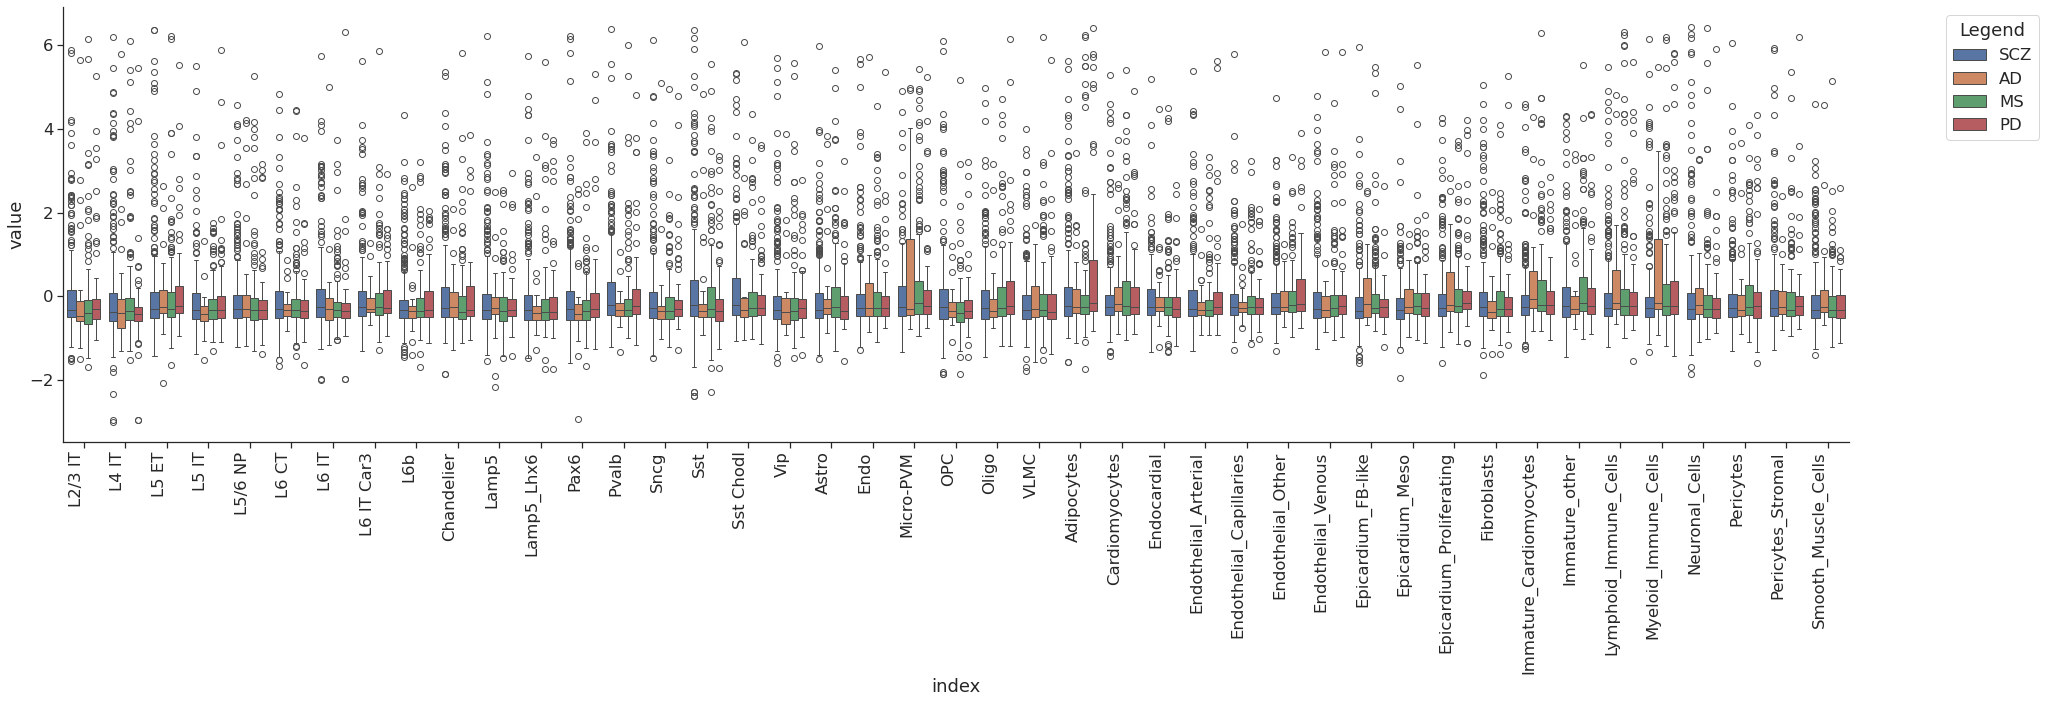

In [564]:
plt.figure(figsize=(32, 8))
features = features.sort_values(by=['subclass', 'index'])
#sns.scatterplot(data=df2.reset_index() , x='index', y='value', hue='disease')
sns.boxplot(data=features , x='index', y='value', hue='disease')
#sns.lineplot(data=features , x='index', y='value', hue='disease')
plt.legend(title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left')
dt = features.groupby(['index', 'disease', 'subclass']).mean().reset_index()
#plt.figure(figsize=(32, 8))
dt = dt.sort_values(by=['subclass', 'index'])
#sns.lineplot(data=dt , x='index', y='value', hue='disease', palette=subclass_color_dict)
plt.xticks(rotation=90, ha='right')
#sns.lineplot(data=features, y='value',x='index', hue='disease')

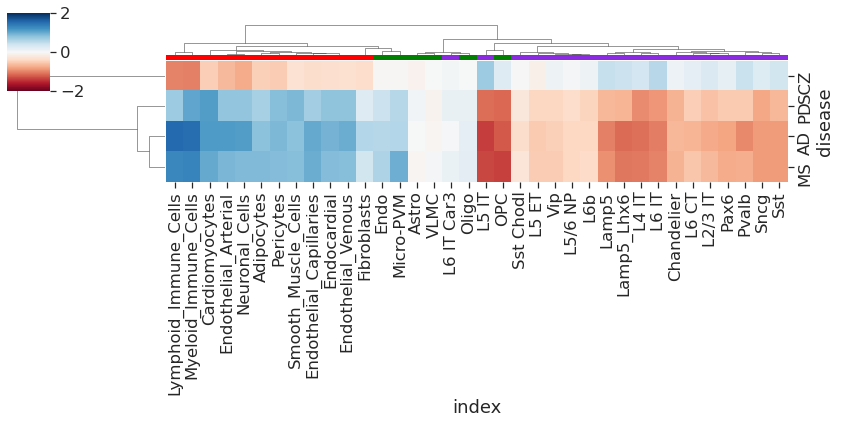

In [446]:
ft = pd.pivot_table(data=dt,index='index', columns='disease', values='value')
ft = ft.T
col_colors = ft.index.map(subclass_color_dict)
row_colors = ft.columns.map(class2_dict).map(subclass_color_dict)
#sns.clustermap(features,row_cluster=True,col_cluster=True, col_colors=col_colors,row_colors=row_colors,yticklabels=True, figsize=(22,13), cmap='RdBu', z_score=1, vmin=-2,vmax=2)
sns.clustermap(ft, col_colors=row_colors,cmap='RdBu',xticklabels=True, figsize=(12,6),  row_cluster=True, vmin=-2, vmax=2)


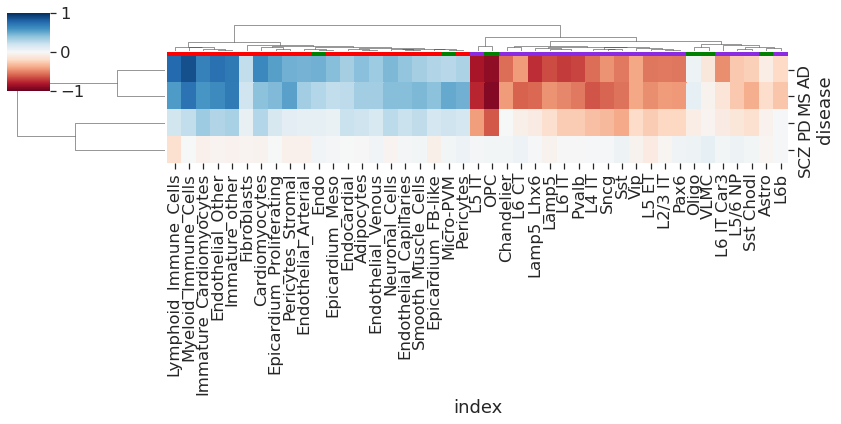

In [501]:
ft = pd.pivot_table(data=dt,index='index', columns='disease', values='value')
ft = ft.T
col_colors = ft.index.map(subclass_color_dict)
row_colors = ft.columns.map(class2_dict).map(subclass_color_dict)
#sns.clustermap(features,row_cluster=True,col_cluster=True, col_colors=col_colors,row_colors=row_colors,yticklabels=True, figsize=(22,13), cmap='RdBu', z_score=1, vmin=-2,vmax=2)
sns.clustermap(ft, col_colors=row_colors,cmap='RdBu',xticklabels=True, figsize=(12,6),  row_cluster=True, vmin=-1, vmax=1)


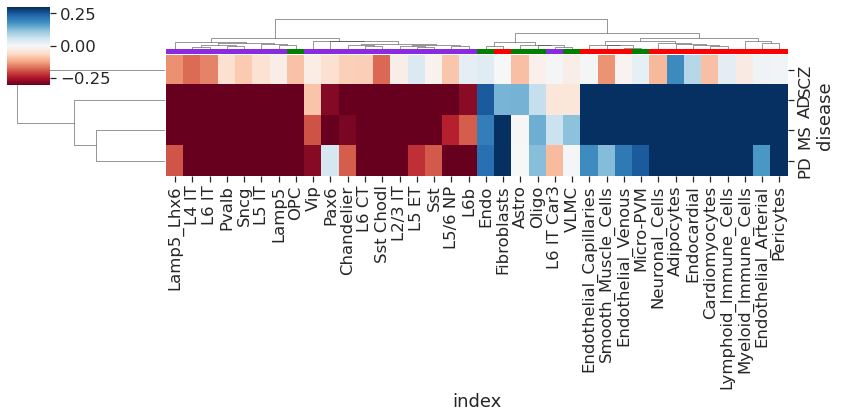

In [462]:
ft = pd.pivot_table(data=dt,index='index', columns='disease', values='value')
ft = ft.T
col_colors = ft.index.map(subclass_color_dict)
row_colors = ft.columns.map(class2_dict).map(subclass_color_dict)
#sns.clustermap(features,row_cluster=True,col_cluster=True, col_colors=col_colors,row_colors=row_colors,yticklabels=True, figsize=(22,13), cmap='RdBu', z_score=1, vmin=-2,vmax=2)
sns.clustermap(ft, col_colors=row_colors,cmap='RdBu',xticklabels=True, figsize=(12,6),  row_cluster=True, vmin=-0.3, vmax=0.3)


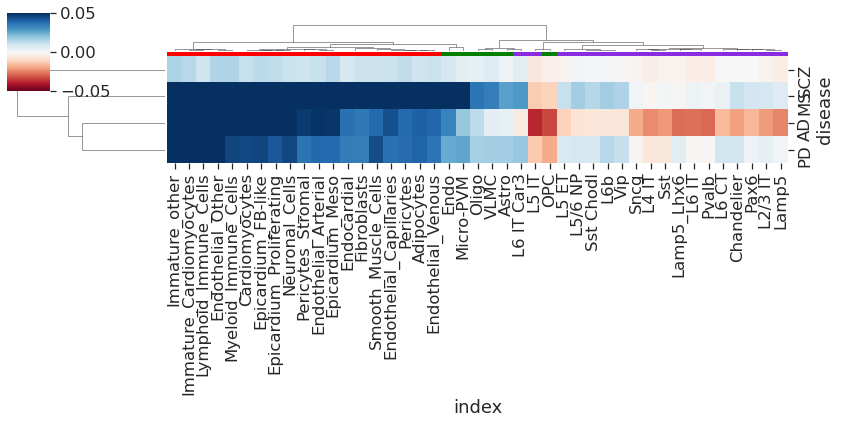

In [550]:
ft = pd.pivot_table(data=dt,index='index', columns='disease', values='value')
ft = ft.T
col_colors = ft.index.map(subclass_color_dict)
row_colors = ft.columns.map(class2_dict).map(subclass_color_dict)
#sns.clustermap(features,row_cluster=True,col_cluster=True, col_colors=col_colors,row_colors=row_colors,yticklabels=True, figsize=(22,13), cmap='RdBu', z_score=1, vmin=-2,vmax=2)
sns.clustermap(ft, col_colors=row_colors,cmap='RdBu',xticklabels=True, figsize=(12,6),  row_cluster=True, vmin=-0.05, vmax=0.05)



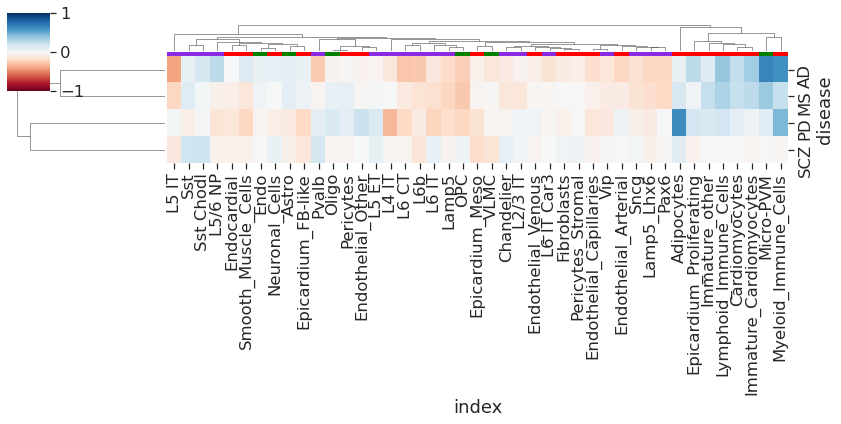

In [572]:
ft = pd.pivot_table(data=dt,index='index', columns='disease', values='value')
ft = ft.T
col_colors = ft.index.map(subclass_color_dict)
row_colors = ft.columns.map(class2_dict).map(subclass_color_dict)
#sns.clustermap(features,row_cluster=True,col_cluster=True, col_colors=col_colors,row_colors=row_colors,yticklabels=True, figsize=(22,13), cmap='RdBu', z_score=1, vmin=-2,vmax=2)
sns.clustermap(ft, col_colors=row_colors,cmap='RdBu',xticklabels=True, figsize=(12,6),  row_cluster=True, vmin=-1, vmax=1)



In [337]:
        dk = adata.to_df(layer='mean')
        #dk = dk.dropna(axis=1)
        my_val=2


        
        

        features = dk.T.reindex(bins_eqtl).T
        features = features.dropna(axis=1)
        
        
        
       

        features['subclass'] = [class2_dict[x] for x in features.index.tolist()]
        features = features[~features.index.isin(['Immature_other', 'Immature_Cardiomyocytes', 'Pericytes_Stromal', 'Epicardium_FB-like', 'Epicardium_Meso', 'Epicardium_Proliferating', 'Endothelial_Other'])]
        features = features.drop(columns=['subclass'])
        #print (features)

        z_scores = stats.zscore(features, axis=0, nan_policy='omit')

        

In [368]:
features

bin_2389340  bin_346037  bin_2338732  bin_1629967  \
Chandelier                 -0.127038    0.357301     0.176607     0.281816   
Lamp5_Lhx6                 -0.063516    0.351905     0.094768     0.389691   
OPC                        -0.127265    0.215041     0.068205     0.314577   
Adipocytes                  0.066996    0.347216     0.304202     0.443433   
Cardiomyocytes              0.147658    0.212592     0.348583     0.451282   
Endocardial                 0.057912    0.228720     0.218514     0.340039   
Endothelial_Arterial        0.181317    0.348563     0.339404     0.418153   
Endothelial_Capillaries     0.088174    0.365244     0.313283     0.433591   
Endothelial_Venous          0.082358    0.315546     0.322039     0.418106   
Fibroblasts                 0.014306    0.319708     0.303989     0.437356   
Lymphoid_Immune_Cells       0.180136    0.362652     0.366151     0.421496   
Myeloid_Immune_Cells        0.236919    0.299651     0.406386     0.378136   
Neuronal_Cells              0.094809    0.398381     0.383917     0.493631   
Pericytes                   0.062248    0.476134     0.231988     0.487264   
Smooth_Muscle_Cells         0.011755    0.401538     0.348382     0.502649   
Lamp5                      -0.123600    0.325238     0.059575     0.511360   
Pax6                        0.000076    0.337105     0.151222     0.407575   
Sncg                       -0.036671    0.359833     0.069988     0.360295   
L4 IT                      -0.043655    0.325570     0.109990     0.324902   
L5 IT                      -0.045387    0.309480    -0.035841     0.337852   
Pvalb                      -0.139483    0.261090     0.114554     0.268859   
L2/3 IT                    -0.076506    0.302511     0.127835     0.394034   
L6 IT                      -0.032886    0.301186     0.094680     0.375603   
L6 IT Car3                  0.005131    0.377344     0.247630     0.372407   
L6b                         0.011178    0.319708     0.157585     0.393521   
Astro                       0.105688    0.379715     0.191257     0.453563   
Micro-PVM                   0.061930    0.255498     0.263721     0.387710   
Oligo                      -0.025316    0.401412     0.249856     0.418317   
VLMC                       -0.052994    0.301132     0.197667     0.393436   
Sst Chodl                  -0.069344    0.325980     0.085172     0.347657   
Vip                         0.026039    0.254976     0.176075     0.360681   
L6 CT                       0.028875    0.330467     0.190629     0.396180   
L5 ET                       0.013047    0.358042     0.149895     0.425968   
Sst                        -0.022904    0.204918     0.117974     0.401383   
L5/6 NP                     0.035291    0.325590     0.178402     0.390281   
Endo                       -0.015216    0.387981     0.234300     0.346517   

                         bin_2666158  bin_2792550  bin_8358  bin_200413  \
Chandelier                  0.282451    -0.330450  0.003256   -0.226676   
Lamp5_Lhx6                  0.134422    -0.252684 -0.035294   -0.265779   
OPC                         0.259145    -0.288779 -0.024034   -0.252297   
Adipocytes                  0.617415    -0.285907  0.131402   -0.323280   
Cardiomyocytes              0.615067    -0.327896  0.083151   -0.248890   
Endocardial                 0.650990    -0.372729  0.072477   -0.186068   
Endothelial_Arterial        0.644592    -0.307754  0.132306   -0.173422   
Endothelial_Capillaries     0.787664    -0.329542  0.140350   -0.198904   
Endothelial_Venous          0.741717    -0.328406  0.120893   -0.183374   
Fibroblasts                 0.532846    -0.282433  0.137727   -0.229328   
Lymphoid_Immune_Cells       0.642874    -0.320128  0.280666   -0.072899   
Myeloid_Immune_Cells        0.758602    -0.392641  0.189511   -0.180827   
Neuronal_Cells              0.666397    -0.268078  0.113534   -0.179402   
Pericytes                   0.620376    -0.263040  0.138968   -0.192164   
Smooth_Muscle

/home/lohia/miniconda3/envs/hicexplorer/lib/python3.8/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


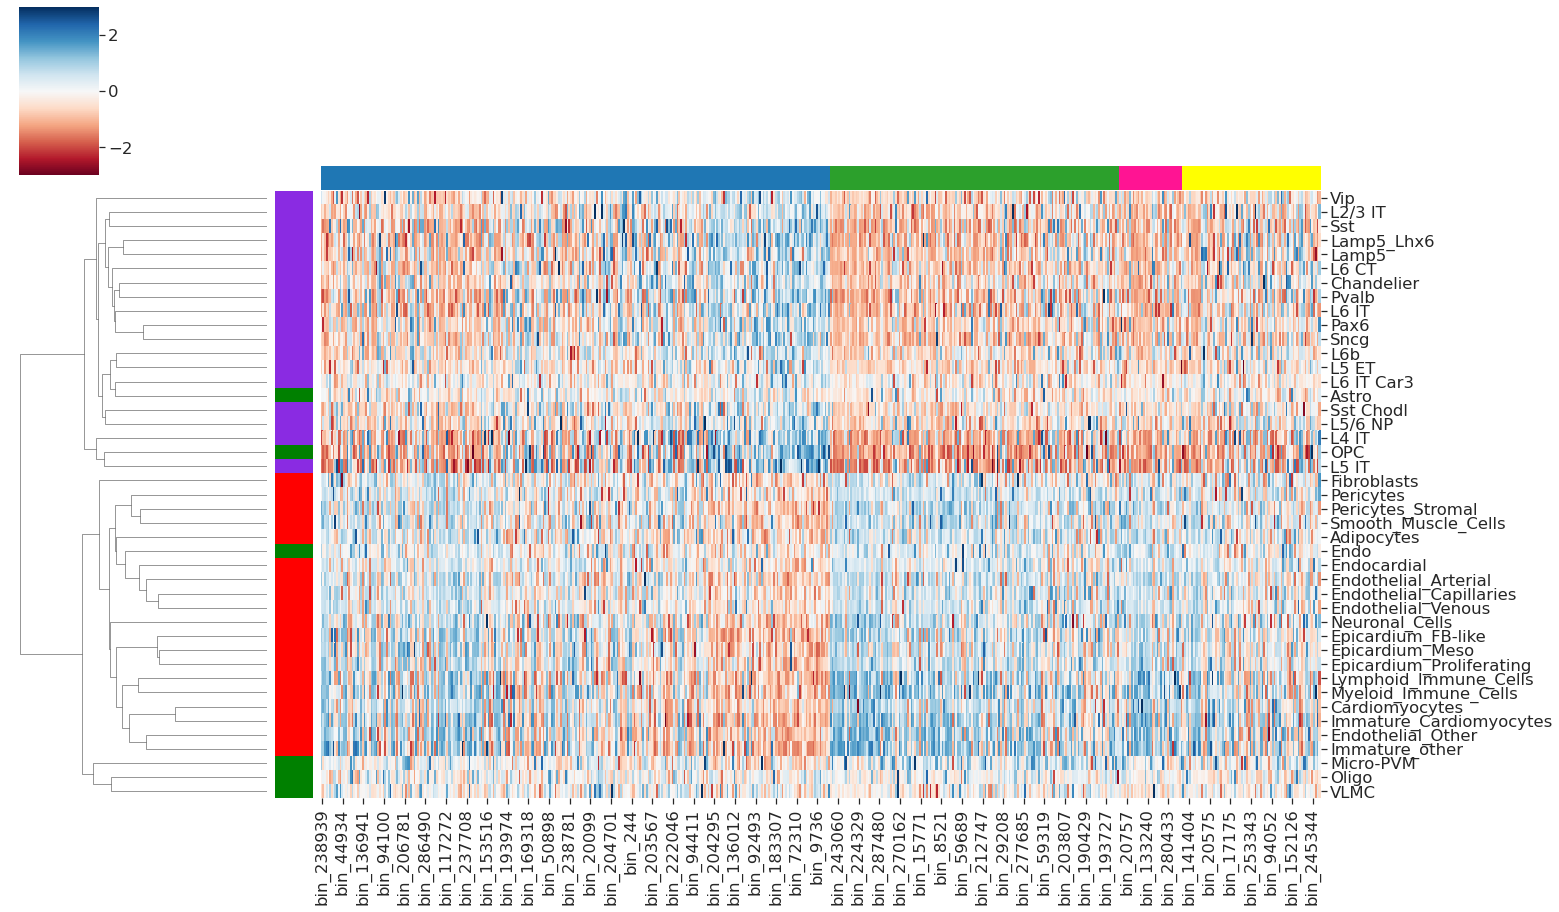

In [552]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Define your own subclass-to-color mapping
subclass_color_dict = {
    'SCZ': '#1f77b4',  # Blue
    'MS': '#2ca02c',  # Orange
    'AD': 'deeppink',  # Green
    'PD': 'yellow',  # Green'SCZ', 'MS', 'AD', 'PD'
    'N' : 'blueviolet',
    'NN' : 'Green',
    'heart': 'Red'
    # Add more subclasses and their corresponding colors here
}

col_colors = features.columns.map(bin_md_dict).map(subclass_color_dict)
row_colors = features.index.map(class2_dict).map(subclass_color_dict)
sns.clustermap(features,row_cluster=True,col_cluster=False, col_colors=col_colors,row_colors=row_colors,yticklabels=True, figsize=(22,13), cmap='RdBu', z_score=1, vmin=-3,vmax=3)


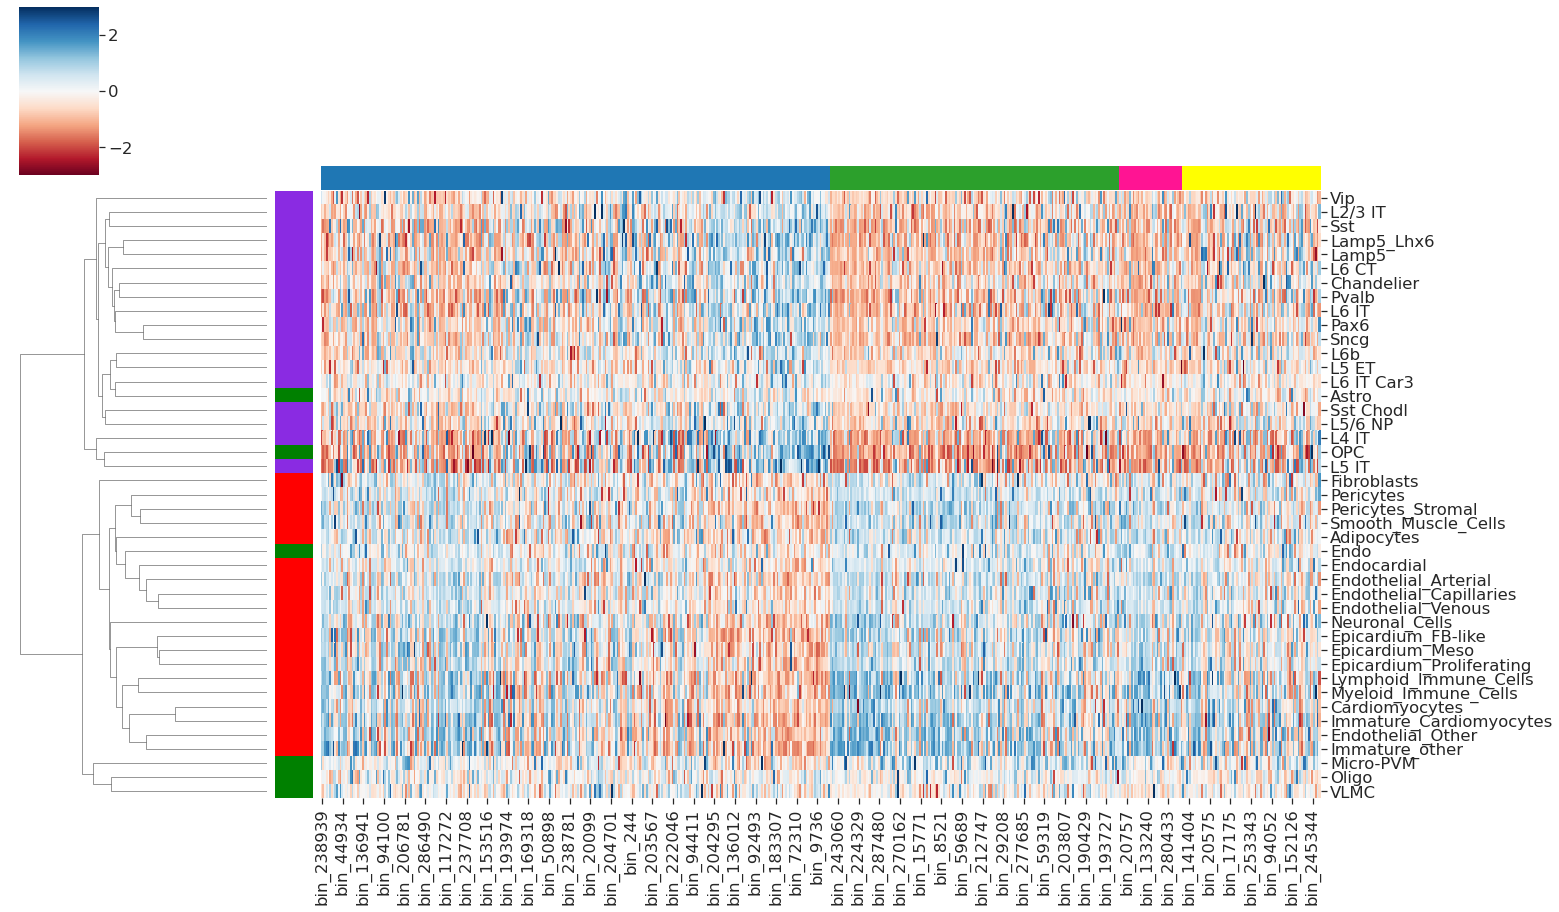

In [554]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Define your own subclass-to-color mapping
subclass_color_dict = {
    'SCZ': '#1f77b4',  # Blue
    'MS': '#2ca02c',  # Orange
    'AD': 'deeppink',  # Green
    'PD': 'yellow',  # Green'SCZ', 'MS', 'AD', 'PD'
    'N' : 'blueviolet',
    'NN' : 'Green',
    'heart': 'Red'
    # Add more subclasses and their corresponding colors here
}

col_colors = features.columns.map(bin_md_dict).map(subclass_color_dict)
row_colors = features.index.map(class2_dict).map(subclass_color_dict)
sns.clustermap(features,row_cluster=True,col_cluster=False, col_colors=col_colors,row_colors=row_colors,yticklabels=True, figsize=(22,13), cmap='RdBu', vmin=-3,vmax=3, z_score=1)


In [625]:
no_of_markers_list = [200]    
for no_of_markers in no_of_markers_list:

    for species in ['human']:
        for process_type in ['inter']:
            if species == 'human':
                marker_name_list = ['brain_class']

            else:
                marker_name_list = ['brain_class']

            for shuf in [False]:
                for drop_duplicates in [False]:
                    for marker_name in marker_name_list:
                        if process_type == 'intra':
                            resolution_list = [ '250kbp_raw', '100kbp_raw', '40kbp_raw', '10kbp_raw', '1kbp_raw']
                            ice_type='KR'
                        else:
                            resolution_list = ['1kbp_raw']
                            ice_type='none'
                        for resolution in resolution_list:
                            for dist in [0]:
                                layer_name = 'z_scores'
                                base_folder = '/grid/gillis/data_norepl/lohia/'
                                SRP_name='aggregates'
                                
                                if species=='mouse':
                                    gene_annot_file=f'{base_folder}/hi_c_data_processing/genomes_jlee/Mus_musculus.GRCm38.94.gtf.gz'
                                else:
                                    gene_annot_file=f'{base_folder}/hi_c_data_processing/genomes_jlee/gencode.v28.chr_patch_hapl_scaff.annotation.gtf.gz' 
                                #input_file_h5ad = f'{base_folder}/hi_c_data_processing/data_{species}/aggregates/{resolution}/max/hic_gene_{process_type}_{ice_type}_{dist}_{layer_name}_{drop_duplicates}_{shuf}_{marker_name}_{no_of_markers}_by_allbins_max_mean.h5ad'
                                outputfile_h5ad = f'{base_folder}/hi_c_data_processing/data_{species}/aggregates/{resolution}/max/hic_gene_{process_type}_{ice_type}_{dist}_{layer_name}_{drop_duplicates}_{shuf}_{marker_name}_{no_of_markers}_by_allbins_max_mean_cross_species_overlap.h5ad'



In [626]:
adata = ad.read_h5ad(f'{outputfile_h5ad}', backed='r')

df = adata.to_df(layer='mean_pearson')

df_layer = df.copy()

In [627]:
df_layer

Lamp5      Sncg     L5 IT     Pvalb   L2/3 IT     L6 IT  \
Lamp5           1.000000 -0.020070  0.052314 -0.139267  0.033993 -0.061998   
Sncg           -0.020070  1.000000 -0.047837 -0.107684  0.047070 -0.065801   
L5 IT           0.052314 -0.047837  1.000000 -0.121945  0.018174  0.037390   
Pvalb          -0.139267 -0.107684 -0.121945  1.000000 -0.108374 -0.088026   
L2/3 IT         0.033993  0.047070  0.018174 -0.108374  1.000000 -0.033546   
L6 IT          -0.061998 -0.065801  0.037390 -0.088026 -0.033546  1.000000   
L6 IT Car3      0.081609  0.023262  0.113714 -0.160453  0.087068  0.025439   
L6b            -0.080604 -0.075242 -0.141370 -0.017574 -0.117725 -0.048575   
Astro          -0.105323 -0.025387 -0.092468 -0.015513 -0.063964 -0.081316   
Micro-PVM      -0.210309 -0.189092 -0.230706  0.079338 -0.214323 -0.052022   
Oligo          -0.154122 -0.186118 -0.159417  0.027037 -0.181096 -0.030825   
VLMC           -0.046819 -0.110169 -0.048306 -0.063294 -0.084243 -0.046640   
Sst Chodl      -0.059335 -0.008105 -0.021609 -0.086132  0.015074 -0.056836   
Vip            -0.028527  0.020935  0.013762 -0.121142 -0.028779 -0.057965   
L6 CT          -0.018697  0.009131 -0.050135 -0.039187 -0.065346 -0.088223   
Sst            -0.004687  0.006023  0.044158 -0.103360  0.059445 -0.067524   
L5/6 NP        -0.005506 -0.133727 -0.038869 -0.059032 -0.127087 -0.098187   
Endo           -0.150329 -0.108180 -0.201272  0.048751 -0.144004 -0.091658   
Lamp5_hic       0.079186  0.068930  0.084701 -0.049850  0.078637 -0.009963   
Sncg_hic        0.077923  0.072224  0.084644 -0.053294  0.084583 -0.006398   
L5 IT_hic       0.142127  0.120899  0.151967 -0.092180  0.143004 -0.032310   
Pvalb_hic       0.091568  0.080139  0.097571 -0.060820  0.096438 -0.019099   
L2/3 IT_hic     0.049243  0.043032  0.052193 -0.030698  0.050600 -0.003171   
L6 IT_hic       0.095398  0.084092  0.103738 -0.064841  0.098627 -0.015993   
L6 IT Car3_hic -0.051516 -0.038923 -0.052380  0.030107 -0.043612  0.010997   
L6b_hic         0.004337  0.002913  0.003840 -0.001265  0.000677 -0.003006   
Astro_hic      -0.073242 -0.067499 -0.081673  0.049565 -0.079455  0.013252   
Micro-PVM_hic  -0.144100 -0.127673 -0.152919  0.093820 -0.151135  0.018665   
Oligo_hic      -0.107897 -0.096106 -0.114919  0.072111 -0.112179  0.014022   
VLMC_hic       -0.087008 -0.082115 -0.096460  0.059818 -0.096681  0.013813   
Sst Chodl_hic   0.016963  0.016719  0.019369 -0.012753  0.021004 -0.001863   
Vip_hic        -0.007853 -0.000578 -0.007755  0.004899 -0.001841  0.010002   
L6 CT_hic       0.017864  0.019590  0.019337 -0.011077  0.020965  0.002768   
Sst_hic         0.065906  0.053958  0.070078 -0.042641  0.064413 -0.013765   
L5/6 NP_hic    -0.002091 -0.004413 -0.006705  0.003957 -0.006786  0.003928   
Endo_hic       -0.122753 -0.106032 -0.128648  0.077207 -0.122289  0.015309   

                L6 IT Car3       L6b     Astro  Micro-PVM  ...  Astro_hic  \
Lamp5             0.081609 -0.080604 -0.105323  -0.210309  ...  -0.073242   
Sncg              0.023262 -0.075242 -0.025387  -0.189092  ...  -0.067499   
L5 IT             0.113714 -0.141370 -0.092468  -0.230706  ...  -0.081673   
Pvalb            -0.160453 -0.017574 -0.015513   0.079338  ...   0.049565   
L2/3 IT           0.087068 -0.117725 -0.063964  -0.214323  ...  -0.079455   
L6 IT             0.025439 -0.048575 -0.081316  -0.052022  ...   0.013252   
L6 IT Car3        1.000000 -0.064595 -0.170908  -0.305922  ...  -0.119376   
L6b              -0.064595  1.000000 -0.055651  -0.005825  ...   0.029725   
Astro            -0.170908 -0.055651  1.000000   0.048573  ...   0.043625   
Micro-PVM        -0.305922 -0.005825  0.048573   1.000000  ...   0.163431   
Oligo            -0.235397 -0.019168  0.011910   0.232827  ...   0.127537   
VLMC             -0.044942 -0.081267 -0.082451  -0.030848  ...   0.010001   
Sst Chodl        -0.007109 -0.064570 -0.055493  -0.145156  ...  -0.036515   
Vip               0.026997 -0.083741 -0.091785  -0.132

In [628]:

df_layer = df_layer[df_layer.index.isin(class2_dict.keys())]

col_list = [x+'_hic' for x in df_layer.index.tolist()]

df_layer = df_layer[col_list]

df_layer = df_layer.T

df_layer.index = df_layer.columns.tolist()

df_layer = df_layer.T

In [629]:
df_layer

Lamp5      Sncg     L5 IT     Pvalb   L2/3 IT     L6 IT  \
Lamp5       0.079186  0.077923  0.142127  0.091568  0.049243  0.095398   
Sncg        0.068930  0.072224  0.120899  0.080139  0.043032  0.084092   
L5 IT       0.084701  0.084644  0.151967  0.097571  0.052193  0.103738   
Pvalb      -0.049850 -0.053294 -0.092180 -0.060820 -0.030698 -0.064841   
L2/3 IT     0.078637  0.084583  0.143004  0.096438  0.050600  0.098627   
L6 IT      -0.009963 -0.006398 -0.032310 -0.019099 -0.003171 -0.015993   
L6 IT Car3  0.125521  0.122048  0.225684  0.146049  0.076197  0.153012   
L6b        -0.030728 -0.028421 -0.058442 -0.038998 -0.018771 -0.038898   
Astro      -0.047619 -0.047101 -0.080803 -0.050865 -0.028385 -0.055350   
Micro-PVM  -0.174028 -0.177014 -0.301314 -0.197198 -0.109744 -0.207815   
Oligo      -0.131285 -0.131420 -0.237782 -0.154140 -0.080925 -0.160622   
VLMC       -0.004643 -0.014592 -0.008989 -0.006830 -0.003945 -0.006714   
Sst Chodl   0.035312  0.042750  0.063192  0.039800  0.021497  0.042352   
Vip         0.048716  0.043526  0.079749  0.050811  0.031232  0.056259   
L6 CT       0.008335  0.014044  0.015023  0.010397  0.004756  0.009877   
Sst         0.098804  0.097644  0.175265  0.113675  0.060196  0.119468   
L5/6 NP     0.011402  0.007833  0.016210  0.010299  0.007392  0.011173   
Endo       -0.122027 -0.118778 -0.202162 -0.131002 -0.076837 -0.141219   

            L6 IT Car3       L6b     Astro  Micro-PVM     Oligo      VLMC  \
Lamp5        -0.051516  0.004337 -0.073242  -0.144100 -0.107897 -0.087008   
Sncg         -0.038923  0.002913 -0.067499  -0.127673 -0.096106 -0.082115   
L5 IT        -0.052380  0.003840 -0.081673  -0.152919 -0.114919 -0.096460   
Pvalb         0.030107 -0.001265  0.049565   0.093820  0.072111  0.059818   
L2/3 IT      -0.043612  0.000677 -0.079455  -0.151135 -0.112179 -0.096681   
L6 IT         0.010997 -0.003006  0.013252   0.018665  0.014022  0.013813   
L6 IT Car3   -0.080871  0.006265 -0.119376  -0.225373 -0.170657 -0.140383   
L6b           0.023587 -0.001370  0.029725   0.051851  0.040795  0.032741   
Astro         0.031058 -0.003167  0.043625   0.083333  0.063523  0.050187   
Micro-PVM     0.102682 -0.006883  0.163431   0.325305  0.239437  0.196226   
Oligo         0.081339 -0.005834  0.127537   0.238907  0.181337  0.150893   
VLMC         -0.009499  0.001185  0.010001   0.022799  0.012148  0.015516   
Sst Chodl    -0.012296 -0.000194 -0.036515  -0.073520 -0.052382 -0.046441   
Vip          -0.036063  0.003024 -0.042274  -0.083545 -0.064506 -0.045827   
L6 CT         0.000193 -0.000475 -0.010728  -0.021825 -0.014064 -0.014674   
Sst          -0.063426  0.004789 -0.094181  -0.176706 -0.134529 -0.110260   
L5/6 NP      -0.011756  0.002232 -0.006924  -0.019648 -0.014025 -0.005470   
Endo          0.078738 -0.004551  0.109975   0.213846  0.162757  0.128750   

            Sst Chodl       Vip     L6 CT       Sst   L5/6 NP      Endo  
Lamp5        0.016963 -0.007853  0.017864  0.065906 -0.002091 -0.122753  
Sncg         0.016719 -0.000578  0.019590  0.053958 -0.004413 -0.106032  
L5 IT        0.019369 -0.007755  0.019337  0.070078 -0.006705 -0.128648  
Pvalb       -0.012753  0.004899 -0.011077 -0.042641  0.003957  0.077207  
L2/3 IT      0.021004 -0.001841  0.020965  0.064413 -0.006786 -0.122289  
L6 IT       -0.001863  0.010002  0.002768 -0.013765  0.003928  0.015309  
L6 IT Car3   0.027738 -0.011557  0.027939  0.104891 -0.007175 -0.191711  
L6b         -0.004550  0.007836 -0.004816 -0.027674  0.004536  0.046471  
Astro       -0.010337  0.003328 -0.011638 -0.039303 -0.000440  0.073170  
Micro-PVM   -0.041721  0.001654 -0.047602 -0.139022  0.004289  0.268817  
Oligo       -0.030171  0.008730 -0.030966 -0.107332  0.008405  0.201382  
VLMC        -0.002761 -0.010859 -0.005244  0.000030 -0.000574  0.007791  
Sst Chodl    0.010753  0.005082  0.011412  0.024311 -0.000311 -0.053703  
Vip          0.009881 -0.002504  0.012044  0.042298  0.001779 -0.076442  
L6 CT        0.003374  0.004590  0

[]

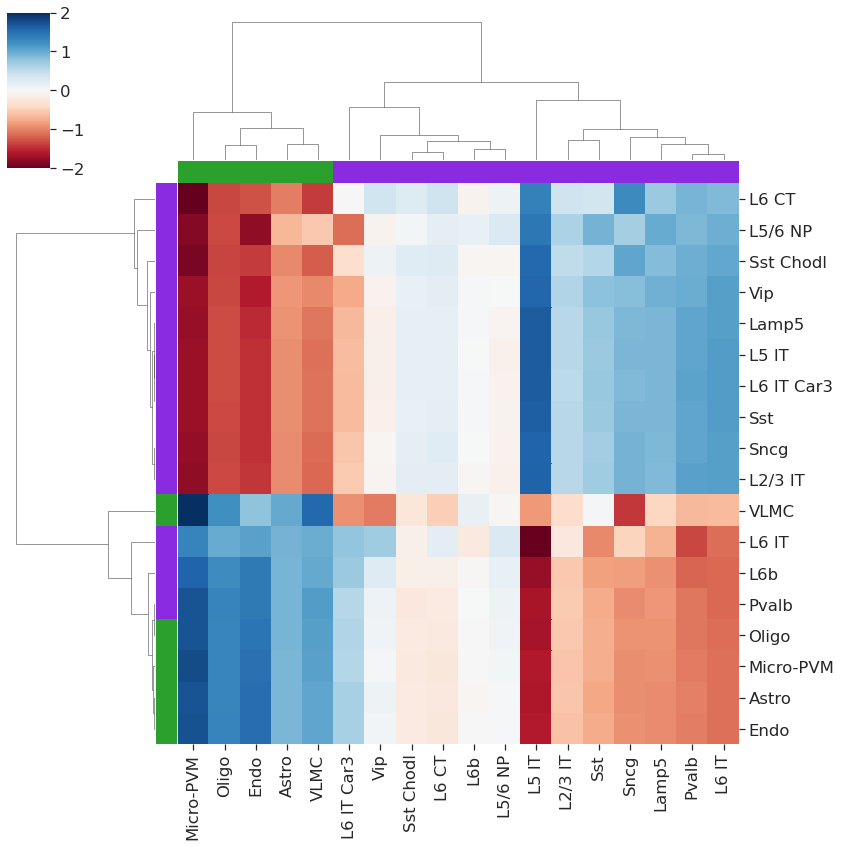

In [630]:
unique_classes = list(set(class4_dict.values()))
palette = sns.color_palette('Set1', len(unique_classes))
class_color_map = {
    'N': 'blueviolet',  # Blue
    'NN': '#2ca02c',  # Orange
    'heart': 'red',  # Green
    'blood': 'red',  # Green
    # Add more subclasses and their corresponding colors here
}

# Map the class_dict to colors
row_colors = df_layer.index.map(class2_dict).map(class_color_map)

# Create the clustermap
#ax = sns.clustermap(df_layer,figsize=(12,12),  cmap='RdBu', z_score=0,col_cluster=False,row_cluster=False, vmin=-3,vmax=3 )
ax = sns.clustermap(df_layer,figsize=(12,12), row_colors=row_colors,col_colors=row_colors, cmap='RdBu', z_score=0,col_cluster=True,row_cluster=True, vmin=-2,vmax=2 )
#sns.clustermap(df_layer,figsize=(12,12), row_colors=row_colors, cmap='RdBu',col_colors=row_colors, z_score=0,col_cluster=False,row_cluster=False, vmin=-2, vmax=2 )
#sns.clustermap(df_layer,figsize=(12,12), cmap='RdBu', col_cluster=False, row_cluster=False, z_score=0)
#sns.clustermap(df_layer,figsize=(12,12), cmap='viridis')
#plt.show()
ax.savefig(f'/home/lohia/{species}_{process_type}_{marker_name}_atac.pdf')
plt.plot()
#col is Hi-C
#row is experiment


In [606]:
df_list_egad = []
no_of_markers_list = [200]     
for no_of_markers in no_of_markers_list:

    for species in ['human']:
        for process_type in ['inter']:
            if species == 'human':
                marker_name_list = ['brain_class']

            else:
                marker_name_list = ['brain_class']

            for shuf in [False]:
                for drop_duplicates in [False]:
                    for marker_name in marker_name_list:
                        if process_type == 'intra':
                            resolution_list = [ '1kbp_raw']
                            ice_type='KR'
                        else:
                            resolution_list = ['1kbp_raw']
                            ice_type='none'
                        for resolution in resolution_list:
                            for dist in [0]:
                                layer_name = 'z_scores'
                                base_folder = '/grid/gillis/data_norepl/lohia/'
                                SRP_name='aggregates'
                                
                                if species=='mouse':
                                    gene_annot_file=f'{base_folder}/hi_c_data_processing/genomes_jlee/Mus_musculus.GRCm38.94.gtf.gz'
                                else:
                                    gene_annot_file=f'{base_folder}/hi_c_data_processing/genomes_jlee/gencode.v28.chr_patch_hapl_scaff.annotation.gtf.gz' 
                                #input_file_h5ad = f'{base_folder}/hi_c_data_processing/data_{species}/aggregates/{resolution}/max/hic_gene_{process_type}_{ice_type}_{dist}_{layer_name}_{drop_duplicates}_{shuf}_{marker_name}_{no_of_markers}_by_allbins_max_mean.h5ad'
                                outputfile_h5ad = f'{base_folder}/hi_c_data_processing/data_{species}/aggregates/{resolution}/max/{marker_name}/mean/hic_gene_{ice_type}_{process_type}_{dist}_{layer_name}_{drop_duplicates}_{shuf}_{marker_name}_{no_of_markers}_by_allbins_max_mean.h5ad'



In [607]:
adata = ad.read_h5ad(f'{outputfile_h5ad}', backed='r')

In [608]:
def calculate_category_means_ignore_nan(gene_observation_matrix_df, gene_category_matrix_df):
    # Calculate mean for each category (axis=0) and each observation (axis=1), ignoring NaN values


    genes_intersect = gene_observation_matrix_df.index.intersection(gene_category_matrix_df.index)

    gene_observation_matrix_df =  gene_observation_matrix_df.loc[genes_intersect, :]
    gene_category_matrix_df = gene_category_matrix_df.loc[genes_intersect, :]

    gene_observation_matrix = gene_observation_matrix_df.values
    gene_category_matrix = gene_category_matrix_df.values

    category_counts = np.dot(gene_category_matrix.T, ~np.isnan(gene_observation_matrix))
    
    gene_observation_matrix_cleaned = np.nan_to_num(gene_observation_matrix, nan=0.0)
    
    category_sums = np.dot(gene_category_matrix.T, gene_observation_matrix_cleaned)
    
    # Calculate mean using only non-NaN values
    category_means = category_sums / category_counts
    
    # Replace NaN values in category_means with 0 where division by 0 occurred
    #category_means[np.isnan(category_means)] = 0.0
    
    return category_means, category_counts

In [609]:
                if species == 'human':
                    max_bins = 38

                    module_path = '/grid/gillis/data_norepl/lohia/BICCN_enhancer_challenege/catlas_ccre/human/li2023/tables10_cis_modules.bed'

                    os.system(f"bedtools intersect -wo -a {module_path} -b {base_folder}/hi_c_data_processing/data_{species}/{SRP_name}/{resolution}/max/regions_bed_file.tsv > {base_folder}/hi_c_data_processing/data_{species}/{SRP_name}/{resolution}/max/cre_modules.bed")
                    df_hba_modules = pd.read_csv(f'{base_folder}/hi_c_data_processing/data_{species}/{SRP_name}/{resolution}/max/cre_modules.bed', sep='\t', names=['c','d', 'e', 'f', 'ccre', 'chr', 'start', 'end', 'bin_id', 'overlap'])
                else:
                    max_bins = 151
                    module_path = '/grid/gillis/data_norepl/lohia/BICCN_enhancer_challenege/catlas_ccre/mouse/Zu_nature2023/'


                    df = pd.read_csv(f'{module_path}/s10_cre_modules.txt', sep='\t')

                    import re
                    df['chrom'] = [re.split(":|-", x)[0] for x in df['cCRE']]
                    df['st'] = [re.split(":|-", x)[1] for x in df['cCRE']]
                    df['end'] = [re.split(":|-", x)[2] for x in df['cCRE']]

                    df[['chrom', 'st', 'end', 'module']].to_csv(f'{module_path}/s10_cre_modules.bed',index=False, header=False, sep='\t')
                    os.system(f"bedtools intersect -wo -a {module_path}/s10_cre_modules.bed -b {base_folder}/hi_c_data_processing/data_{species}/{SRP_name}/{resolution}/max/regions_bed_file.tsv > {base_folder}/hi_c_data_processing/data_{species}/{SRP_name}/{resolution}/max/cre_modules.bed")
                    df_hba_modules = pd.read_csv(f'{base_folder}/hi_c_data_processing/data_{species}/{SRP_name}/{resolution}/max/cre_modules.bed', sep='\t', names=['d', 'e', 'f', 'ccre', 'chr', 'start', 'end', 'bin_id', 'overlap'])


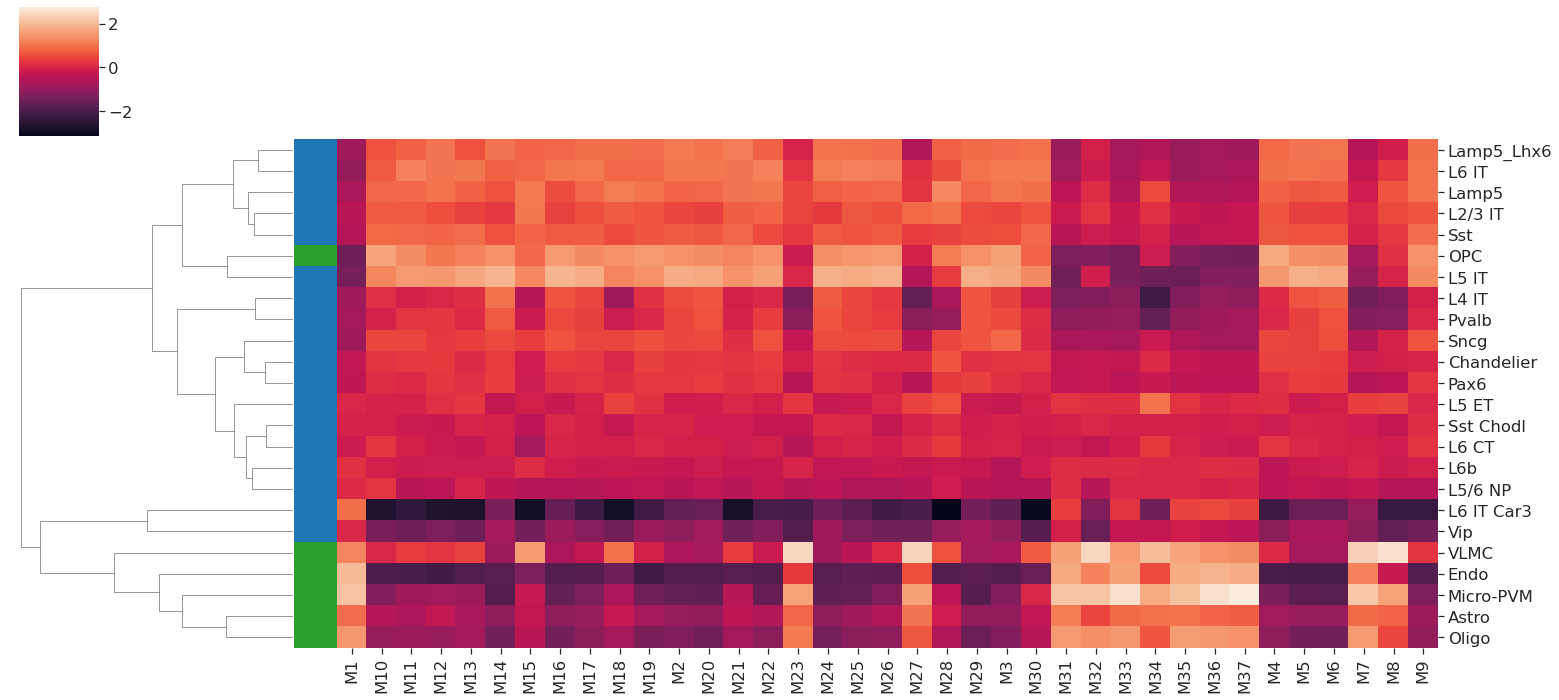

In [610]:
df_hba_modules['bin_id'] = ['bin_'+str(x) for x in df_hba_modules['bin_id'].tolist()]

df_hba_modules['rank'] = 1

marker_table = pd.pivot_table(df_hba_modules, columns='ccre', index='bin_id', values='rank', aggfunc='sum')
marker_table.fillna(0, inplace=True)

marker_table[marker_table != 0] = 1

df_input = adata.to_df(layer='mean').T

category_means, category_counts =  calculate_category_means_ignore_nan(df_input, marker_table)

df = pd.DataFrame(data=category_means,    # values
index=marker_table.columns.tolist(),    # 1st column as index
columns=df_input.columns.tolist()) 

df = df.T

class_color_map = {
    'N': '#1f77b4',  # Blue
    'NN': '#2ca02c',  # Orange
    'heart': 'red',  # Green
    'blood': 'red',  # Green
    # Add more subclasses and their corresponding colors here
}

# Map the class_dict to colors
row_colors = df_layer.index.map(class2_dict).map(class_color_map)


#unique_classes = list(set(class2_dict.values()))
#palette = sns.color_palette('Set1', len(unique_classes))
#class_color_map = dict(zip(unique_classes, palette))

# Map the class_dict to colors

row_colors = df.index.map(class2_dict).map(class_color_map)

sns.clustermap(df,col_cluster=False,row_cluster=True, z_score=1, row_colors=row_colors,yticklabels=True, figsize=(22,10))



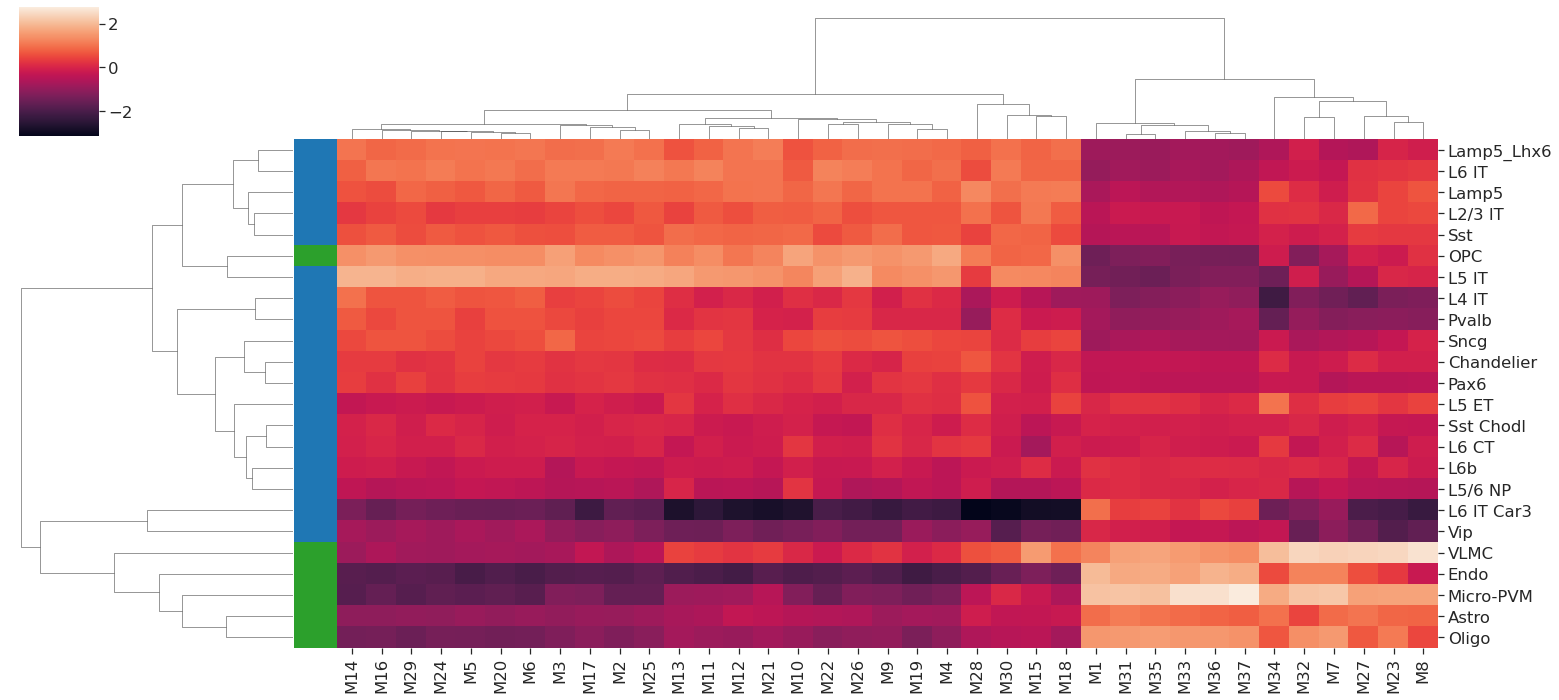

In [612]:
sns.clustermap(df,col_cluster=True,row_cluster=True, z_score=1, row_colors=row_colors,yticklabels=True, figsize=(22,10))
